In [91]:
import pandas as pd
import numpy as np


In [92]:
##Datasets scraped from Kaggle, news article, and basketball reference
game = pd.read_csv("game.csv")
column_names = ["season_id","trade_ddl"]
trade_ddl = pd.read_csv("ddl.csv",names= column_names, header=None)  
winners = pd.read_csv("new_winner.csv")
mvp = pd.read_csv("mvp.csv")
defensive = pd.read_csv("defensive.csv")
playoff = pd.read_csv("playoff.csv")
elo = pd.read_csv("long_elo_table.csv")
allstar = pd.read_csv("new_all_star.csv")
game.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47,-16,0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,17,0


# Data Cleaning

In [93]:
#check basic properties of the  game dataframe
print(game.columns)
print(game.shape)
print(game["season_id"].unique())

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away'],
      dtype='object')
(62367, 54)
[21946 21947 21948 21949 21950 21951 21952 21953 21954 21955 21956 21957
 21958 21959 21960 21961 21962 21963 21964 21965 2196

In [94]:
## Filter out columns that are needed

selected_columns = ['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
    'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
    'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
    'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
    'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
    'pts_home', 'plus_minus_home', 'team_id_away',
    'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
    'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
    'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
    'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
    'pf_away', 'pts_away', 'plus_minus_away'
]

## Trade deadlines only trackable after the 1987 nba season
filtered_data = game[game['season_id'] > 21987][selected_columns]

# Merge the dataframes on season_id
filtered_data = pd.merge(filtered_data, trade_ddl, on='season_id', how='left')

In [95]:
filtered_data.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,trade_ddl
0,21989,1610612748,MIA,Miami Heat,28900006,1989-11-03 00:00:00,MIA vs. NJN,L,240,35.0,93.0,0.376,1.0,4.0,0.250,19.0,32.0,0.594,19.0,32.0,51.0,19.0,7.0,8.0,16.0,26.0,90,-20,1610612751,NJN,New Jersey Nets,NJN @ MIA,W,38.0,86.0,0.442,1.0,6.0,0.167,33.0,37.0,0.892,10.0,40.0,50.0,20.0,7.0,10.0,14.0,25.0,110,20,1990-02-22 00:00:00
1,21989,1610612741,CHI,Chicago Bulls,28900009,1989-11-03 00:00:00,CHI vs. CLE,W,265,44.0,93.0,0.473,4.0,11.0,0.364,32.0,43.0,0.744,14.0,30.0,44.0,27.0,10.0,5.0,12.0,25.0,124,5,1610612739,CLE,Cleveland Cavaliers,CLE @ CHI,L,48.0,93.0,0.516,4.0,14.0,0.286,19.0,33.0,0.576,13.0,33.0,46.0,32.0,7.0,6.0,20.0,30.0,119,-5,1990-02-22 00:00:00
2,21989,1610612756,PHX,Phoenix Suns,28900003,1989-11-03 00:00:00,PHX vs. GOS,W,240,49.0,96.0,0.510,3.0,6.0,0.500,35.0,42.0,0.833,16.0,32.0,48.0,32.0,12.0,3.0,17.0,29.0,136,30,1610612744,GOS,Golden State Warriors,GOS @ PHX,L,36.0,89.0,0.404,4.0,10.0,0.400,30.0,36.0,0.833,15.0,29.0,44.0,20.0,6.0,6.0,29.0,32.0,106,-30,1990-02-22 00:00:00
3,21989,1610612746,LAC,Los Angeles Clippers,28900001,1989-11-03 00:00:00,LAC vs. HOU,W,240,45.0,90.0,0.500,0.0,2.0,0.000,12.0,22.0,0.545,14.0,24.0,38.0,30.0,17.0,4.0,19.0,22.0,102,14,1610612745,HOU,Houston Rockets,HOU @ LAC,L,33.0,74.0,0.446,1.0,4.0,0.250,21.0,28.0,0.750,10.0,26.0,36.0,16.0,11.0,5.0,25.0,27.0,88,-14,1990-02-22 00:00:00
4,21989,1610612738,BOS,Boston Celtics,28900008,1989-11-03 00:00:00,BOS vs. MIL,W,240,49.0,81.0,0.605,1.0,3.0,0.333,28.0,39.0,0.718,11.0,33.0,44.0,37.0,5.0,5.0,16.0,27.0,127,13,1610612749,MIL,Milwaukee Bucks,MIL @ BOS,L,35.0,83.0,0.422,5.0,11.0,0.455,39.0,43.0,0.907,8.0,20.0,28.0,21.0,13.0,4.0,9.0,31.0,114,-13,1990-02-22 00:00:00


In [96]:
# Set the option to None to display all columns
pd.set_option('display.max_rows', None)

# Set the option to None to display all columns
pd.set_option('display.max_columns', None)

In [97]:
##Split the data into home and away dataframes, concatenate then split into pre-trade and post-trade data, compute the mean statisic for each team per season

# Create a list of common columns that are same for both home and away
common_cols = ['game_id', 'season_id','game_date',"trade_ddl"]

# Identify columns specific to home and away
home_cols = [col for col in filtered_data.columns if col.endswith('_home')] + common_cols
away_cols = [col for col in filtered_data.columns if col.endswith('_away')] + common_cols

# Create separate dataframes for home and away
home_data = filtered_data[home_cols].copy()
away_data = filtered_data[away_cols].copy()

# Rename columns to remove '_home' and '_away'
home_data.columns = [col.replace('_home', '') for col in home_data.columns]
away_data.columns = [col.replace('_away', '') for col in away_data.columns]

# Replace 'W' with 1 and 'L' with 0 in the 'wl' column 
home_data['wl'] = home_data['wl'].map({'W': 1, 'L': 0})
away_data['wl'] = away_data['wl'].map({'W': 1, 'L': 0})

# Combine home and away data verticallt
combined_data = pd.concat([home_data, away_data])


# Split into pre and post trade
combined_data_pre = combined_data[combined_data['game_date'] <= combined_data['trade_ddl']]
combined_data_pre['games_played'] = combined_data_pre.groupby(['team_name', 'season_id']).game_id.transform('count')
combined_data_post = combined_data[combined_data['game_date'] > combined_data['trade_ddl']]
combined_data_post['games_played'] = combined_data_post.groupby(['team_name', 'season_id']).game_id.transform('count')

# Group and calculate mean
combined_grouped_pre = combined_data_pre.groupby(['team_name', 'team_abbreviation','season_id']).mean().reset_index()
combined_grouped_post = combined_data_post.groupby(['team_name', 'season_id']).mean().reset_index()

# Merge pre and post dataframes
final_data = pd.merge(combined_grouped_pre, combined_grouped_post, on=['team_name', 'season_id'], suffixes=('_pre', '_post'))


/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_36083/3341163802.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_pre['games_played'] = combined_data_pre.groupby(['team_name', 'season_id']).game_id.transform('count')
/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_36083/3341163802.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_post['games_played'] = combined_data_post.groupby(['team_name', 'season_id']).game_id.transform('count')


In [98]:
final_data.head(50)

,team_name,team_abbreviation,season_id,team_id_pre,wl_pre,fgm_pre,fga_pre,fg_pct_pre,fg3m_pre,fg3a_pre,fg3_pct_pre,ftm_pre,fta_pre,ft_pct_pre,oreb_pre,dreb_pre,reb_pre,ast_pre,stl_pre,blk_pre,tov_pre,pf_pre,pts_pre,plus_minus_pre,game_id_pre,games_played_pre,team_id_post,wl_post,fgm_post,fga_post,fg_pct_post,fg3m_post,fg3a_post,fg3_pct_post,ftm_post,fta_post,ft_pct_post,oreb_post,dreb_post,reb_post,ast_post,stl_post,blk_post,tov_post,pf_post,pts_post,plus_minus_post,game_id_post,games_played_post
0,Atlanta Hawks,ATL,21989,1.610613e+09,0.442308,40.653846,85.576923,0.475250,1.211538,4.711538,0.238333,24.134615,31.173077,0.769308,15.750000,26.307692,42.057692,21.211538,8.884615,4.346154,15.576923,23.038462,106.653846,-1.192308,2.890036e+07,52.0,1.610613e+09,0.600000,43.433333,85.633333,0.506767,2.033333,5.533333,0.347967,22.933333,30.766667,0.746367,15.133333,27.300000,42.433333,23.900000,8.500000,4.233333,14.300000,22.433333,111.833333,4.866667,2.890090e+07,30.0
1,Atlanta Hawks,ATL,21990,1.610613e+09,0.538462,40.865385,87.326923,0.469115,3.384615,10.115385,0.318981,24.384615,30.576923,0.797712,14.423077,29.673077,44.096154,23.500000,9.134615,4.750000,15.173077,21.500000,109.500000,0.884615,2.900035e+07,52.0,1.610613e+09,0.500000,40.800000,89.400000,0.457233,3.166667,10.333333,0.303533,25.533333,31.800000,0.800633,16.166667,29.233333,45.400000,21.400000,8.466667,4.233333,14.000000,21.666667,110.300000,0.566667,2.900090e+07,30.0
2,Atlanta Hawks,ATL,21991,1.610613e+09,0.500000,42.980769,92.807692,0.463673,2.538462,8.038462,0.275096,19.634615,26.557692,0.740673,17.076923,31.230769,48.307692,26.423077,9.269231,4.346154,14.730769,22.153846,108.134615,-0.192308,2.910035e+07,52.0,1.610613e+09,0.400000,41.900000,88.333333,0.475633,2.600000,8.433333,0.298367,16.533333,23.100000,0.720467,13.333333,29.133333,42.466667,24.966667,10.366667,3.133333,15.233333,20.633333,102.933333,-3.766667,2.910091e+07,30.0
3,Atlanta Hawks,ATL,21992,1.610613e+09,0.500000,40.363636,87.954545,0.459977,4.090909,11.522727,0.359750,20.500000,28.000000,0.730750,15.931818,27.613636,43.545455,24.727273,10.454545,3.590909,16.227273,23.477273,105.318182,-2.681818,2.920029e+07,44.0,1.610613e+09,0.552632,42.526316,89.526316,0.475237,5.315789,14.973684,0.351632,19.631579,26.026316,0.748237,15.500000,29.710526,45.210526,26.210526,9.105263,3.157895,15.236842,20.368421,110.000000,1.236842,2.920084e+07,38.0
4,Atlanta Hawks,ATL,21993,1.610613e+09,0.692308,39.596154,86.596154,0.457192,4.000000,11.692308,0.342673,20.038462,25.980769,0.774327,15.807692,28.769231,44.576923,24.519231,11.365385,5.423077,14.480769,19.480769,103.230769,5.884615,2.930036e+07,52.0,1.610613e+09,0.700000,39.600000,84.533333,0.468533,2.000000,7.400000,0.293833,17.133333,23.966667,0.717600,14.266667,30.900000,45.166667,26.033333,10.800000,5.566667,15.066667,20.400000,98.333333,4.200000,2.930090e+07,30.0
5,Atlanta Hawks,ATL,21994,1.610613e+09,0.471698,36.000000,80.849057,0.445604,6.094340,17.981132,0.337717,17.207547,23.566038,0.730321,13.528302,27.320755,40.849057,21.150943,8.754717,5.207547,14.773585,22.377358,95.301887,0.490566,2.940034e+07,53.0,1.610613e+09,0.586207,37.172414,82.586207,0.449690,7.448276,21.620690,0.346655,17.172414,24.103448,0.732448,13.344828,28.413793,41.758621,21.931034,9.448276,4.689655,13.724138,21.310345,98.965517,2.724138,2.940091e+07,29.0
6,Atlanta Hawks,ATL,21995,1.610613e+09,0.538462,36.788462,82.461538,0.446923,6.865385,19.250000,0.355346,18.173077,24.269231,0.745462,14.384615,26.038462,40.423077,19.692308,9.500000,3.788462,14.307692,22.192308,98.615385,0.423077,2.950037e+07,52.0,1.610613e+09,0.600000,35.733333,79.233333,0.451033,6.966667,19.800000,0.354200,19.266667,25.000000,0.767533,14.466667,26.466667,40.933333,19.500000,9.233333,4.066667,14.633333,18.666667,97.700000,2.600000,2.950097e+07,30.0
7,Atlanta Hawks,ATL,21996,1.610613e+09,0.666667,34.215686,77.392157,0.442627,7.980392,22.098039,0.356314,17.431373,22.921569,0.767745,12.529412,29.117647,41.647059,18.156863,7.843137

In [99]:
final_data[["team_name","season_id","wl_pre","wl_post"]].head()

,team_name,season_id,wl_pre,wl_post
0,Atlanta Hawks,21989,0.442308,0.600000
1,Atlanta Hawks,21990,0.538462,0.500000
2,Atlanta Hawks,21991,0.500000,0.400000
3,Atlanta Hawks,21992,0.500000,0.552632
4,Atlanta Hawks,21993,0.692308,0.700000


In [100]:
## check the shape of  the final data
final_data.shape

(963, 49)

In [101]:
# # this is if you want to separate home and away data
# # Convert the 'game_date' and 'trade_ddl' columns to datetime
# home_data['game_date'] = pd.to_datetime(home_data['game_date'])
# away_data['game_date'] = pd.to_datetime(away_data['game_date'])
# filtered_data['trade_ddl'] = pd.to_datetime(filtered_data['trade_ddl'])

# # Add the 'trade_ddl' column to home_data and away_data
# home_data['trade_ddl'] = filtered_data['trade_ddl']
# away_data['trade_ddl'] = filtered_data['trade_ddl']

# # Split into pre and post trade
# home_data_pre = home_data[home_data['game_date'] <= home_data['trade_ddl']]
# home_data_post = home_data[home_data['game_date'] > home_data['trade_ddl']]

# away_data_pre = away_data[away_data['game_date'] <= away_data['trade_ddl']]
# away_data_post = away_data[away_data['game_date'] > away_data['trade_ddl']]

# # Group and calculate mean
# home_grouped_pre = home_data_pre.groupby(['team_name', 'season_id']).mean().reset_index()
# home_grouped_post = home_data_post.groupby(['team_name', 'season_id']).mean().reset_index()

# away_grouped_pre = away_data_pre.groupby(['team_name', 'season_id']).mean().reset_index()
# away_grouped_post = away_data_post.groupby(['team_name', 'season_id']).mean().reset_index()

# # Merge dataframes
# final_data_pre = pd.merge(home_grouped_pre, away_grouped_pre, on=['team_name', 'season_id'], suffixes=('_home_pre', '_away_pre'))
# final_data_post = pd.merge(home_grouped_post, away_grouped_post, on=['team_name', 'season_id'], suffixes=('_home_post', '_away_post'))

# # Concatenate pre and post dataframes
# final_data = pd.concat([final_data_pre, final_data_post], axis=1)

# final_data.head(50)
# final_data.to_csv('home_away.csv', index=False)


In [102]:

defensive.rename(columns={'mvp_number': 'all_defensive'}, inplace=True)

In [103]:
## adds a columns that identify winning team, mvp number, all defensive team players, 
final_data_merged = final_data.merge(winners, on=['team_name', 'season_id'], how='inner')
print(final_data_merged.shape)
final_data_merged = final_data_merged.merge(mvp, on=['team_name', 'season_id'], how='inner')
print(final_data_merged.shape)
final_data_merged = final_data_merged.merge(defensive, on=['team_name', 'season_id'], how='inner')
print(final_data_merged.shape)
final_data_merged.head()

(963, 50)
(963, 51)
(963, 52)


,team_name,team_abbreviation,season_id,team_id_pre,wl_pre,fgm_pre,fga_pre,fg_pct_pre,fg3m_pre,fg3a_pre,fg3_pct_pre,ftm_pre,fta_pre,ft_pct_pre,oreb_pre,dreb_pre,reb_pre,ast_pre,stl_pre,blk_pre,tov_pre,pf_pre,pts_pre,plus_minus_pre,game_id_pre,games_played_pre,team_id_post,wl_post,fgm_post,fga_post,fg_pct_post,fg3m_post,fg3a_post,fg3_pct_post,ftm_post,fta_post,ft_pct_post,oreb_post,dreb_post,reb_post,ast_post,stl_post,blk_post,tov_post,pf_post,pts_post,plus_minus_post,game_id_post,games_played_post,winner,mvp_number,all_defensive
0,Atlanta Hawks,ATL,21989,1.610613e+09,0.442308,40.653846,85.576923,0.475250,1.211538,4.711538,0.238333,24.134615,31.173077,0.769308,15.750000,26.307692,42.057692,21.211538,8.884615,4.346154,15.576923,23.038462,106.653846,-1.192308,2.890036e+07,52.0,1.610613e+09,0.600000,43.433333,85.633333,0.506767,2.033333,5.533333,0.347967,22.933333,30.766667,0.746367,15.133333,27.300000,42.433333,23.900000,8.500000,4.233333,14.300000,22.433333,111.833333,4.866667,2.890090e+07,30.0,0,0,0
1,Atlanta Hawks,ATL,21990,1.610613e+09,0.538462,40.865385,87.326923,0.469115,3.384615,10.115385,0.318981,24.384615,30.576923,0.797712,14.423077,29.673077,44.096154,23.500000,9.134615,4.750000,15.173077,21.500000,109.500000,0.884615,2.900035e+07,52.0,1.610613e+09,0.500000,40.800000,89.400000,0.457233,3.166667,10.333333,0.303533,25.533333,31.800000,0.800633,16.166667,29.233333,45.400000,21.400000,8.466667,4.233333,14.000000,21.666667,110.300000,0.566667,2.900090e+07,30.0,0,0,0
2,Atlanta Hawks,ATL,21991,1.610613e+09,0.500000,42.980769,92.807692,0.463673,2.538462,8.038462,0.275096,19.634615,26.557692,0.740673,17.076923,31.230769,48.307692,26.423077,9.269231,4.346154,14.730769,22.153846,108.134615,-0.192308,2.910035e+07,52.0,1.610613e+09,0.400000,41.900000,88.333333,0.475633,2.600000,8.433333,0.298367,16.533333,23.100000,0.720467,13.333333,29.133333,42.466667,24.966667,10.366667,3.133333,15.233333,20.633333,102.933333,-3.766667,2.910091e+07,30.0,0,0,0
3,Atlanta Hawks,ATL,21992,1.610613e+09,0.500000,40.363636,87.954545,0.459977,4.090909,11.522727,0.359750,20.500000,28.000000,0.730750,15.931818,27.613636,43.545455,24.727273,10.454545,3.590909,16.227273,23.477273,105.318182,-2.681818,2.920029e+07,44.0,1.610613e+09,0.552632,42.526316,89.526316,0.475237,5.315789,14.973684,0.351632,19.631579,26.026316,0.748237,15.500000,29.710526,45.210526,26.210526,9.105263,3.157895,15.236842,20.368421,110.000000,1.236842,2.920084e+07,38.0,0,0,0
4,Atlanta Hawks,ATL,21993,1.610613e+09,0.692308,39.596154,86.596154,0.457192,4.000000,11.692308,0.342673,20.038462,25.980769,0.774327,15.807692,28.769231,44.576923,24.519231,11.365385,5.423077,14.480769,19.480769,103.230769,5.884615,2.930036e+07,52.0,1.610613e+09,0.700000,39.600000,84.533333,0.468533,2.000000,7.400000,0.293833,17.133333,23.966667,0.717600,14.266667,30.900000,45.166667,26.033333,10.800000,5.566667,15.066667,20.400000,98.333333,4.200000,2.930090e+07,30.0,0,0,1


In [104]:
print(final_data_merged.shape)

(963, 52)


In [105]:
final_data_reg = final_data_merged.copy()


In [106]:
##check if the winner of each year match with prior knowledge and official statisitic
final_data_merged.loc[final_data_merged["winner"]==1].sort_values("season_id").head()

,team_name,team_abbreviation,season_id,team_id_pre,wl_pre,fgm_pre,fga_pre,fg_pct_pre,fg3m_pre,fg3a_pre,fg3_pct_pre,ftm_pre,fta_pre,ft_pct_pre,oreb_pre,dreb_pre,reb_pre,ast_pre,stl_pre,blk_pre,tov_pre,pf_pre,pts_pre,plus_minus_pre,game_id_pre,games_played_pre,team_id_post,wl_post,fgm_post,fga_post,fg_pct_post,fg3m_post,fg3a_post,fg3_pct_post,ftm_post,fta_post,ft_pct_post,oreb_post,dreb_post,reb_post,ast_post,stl_post,blk_post,tov_post,pf_post,pts_post,plus_minus_post,game_id_post,games_played_post,winner,mvp_number,all_defensive
239,Detroit Pistons,DET,21989,1.610613e+09,0.735849,40.943396,84.943396,0.483358,1.830189,5.924528,0.281189,20.490566,27.641509,0.740226,14.339623,29.584906,43.924528,24.452830,6.113208,5.415094,14.641509,24.075472,104.207547,6.679245,2.890034e+07,53.0,1.610613e+09,0.689655,40.103448,85.448276,0.471207,2.758621,7.827586,0.355379,21.620690,27.137931,0.793517,14.655172,30.689655,45.344828,24.137931,6.482759,4.517241,14.413793,23.620690,104.586207,5.000000,2.890090e+07,29.0,1,0,2
108,Chicago Bulls,CHI,21990,1.610613e+09,0.725490,44.549020,87.921569,0.507765,1.411765,4.058824,0.336020,18.352941,24.666667,0.743902,14.176471,29.215686,43.392157,27.705882,9.725490,5.607843,14.137255,21.156863,108.862745,7.764706,2.900034e+07,51.0,1.610613e+09,0.774194,43.870968,85.193548,0.516129,2.677419,7.000000,0.374581,21.580645,27.516129,0.776548,13.709677,27.483871,41.193548,25.774194,10.516129,4.903226,13.774194,21.677419,112.000000,11.290323,2.900091e+07,31.0,1,1,2
109,Chicago Bulls,CHI,21991,1.610613e+09,0.811321,44.509434,87.622642,0.509245,1.754717,5.547170,0.312750,19.981132,26.792453,0.745132,14.226415,29.566038,43.792453,27.622642,7.981132,5.811321,13.094340,21.377358,110.754717,10.075472,2.910036e+07,53.0,1.610613e+09,0.827586,44.275862,87.034483,0.509345,1.551724,5.517241,0.269069,18.206897,24.551724,0.736586,14.448276,30.068966,44.517241,28.103448,8.586207,5.931034,12.275862,19.310345,108.310345,11.103448,2.910090e+07,29.0,1,1,2
110,Chicago Bulls,CHI,21992,1.610613e+09,0.673913,41.847826,88.934783,0.470652,2.760870,7.673913,0.372652,18.043478,24.847826,0.728891,16.108696,28.130435,44.239130,26.413043,9.456522,5.347826,13.347826,22.043478,104.500000,5.108696,2.920030e+07,46.0,1.610613e+09,0.722222,43.055556,86.500000,0.498167,3.250000,8.777778,0.380917,16.694444,22.472222,0.746722,15.250000,27.472222,42.722222,25.500000,9.666667,4.444444,12.388889,21.944444,106.055556,7.805556,2.920085e+07,36.0,1,0,3
309,Houston Rockets,HOU,21993,1.610613e+09,0.745098,38.686275,81.705882,0.474863,5.392157,16.784314,0.323412,17.098039,23.431373,0.725490,11.254902,31.901961,43.156863,25.352941,8.764706,5.784314,16.490196,20.529412,99.862745,4.137255,2.930034e+07,51.0,1.610613e+09,0.645161,39.483871,82.774194,0.476484,4.967742,13.838710,0.351871,19.258065,25.258065,0.762258,11.354839,32.000000,43.354839,25.612903,8.709677,6.129032,14.967742,19.322581,103.193548,4.612903,2.930091e+07,31.0,1,0,1


In [107]:
## clean the playoff dataframe
playoff.head()
playoff.rename(columns={'Unnamed: 0': 'season_id','Tm': 'team_name'}, inplace=True)
playoff['season_id'] += 20000-1
playoff = playoff.drop(columns=["Unnamed: 1","Rk"])
final_data_merged = final_data_merged.merge(playoff, on=['team_name', 'season_id'], how= "inner")

##since a large portion of teams don't qualify for playoff each year, our data size shrinks by almost a half.
print(final_data_merged.shape)

(495, 75)


In [108]:
playoff_sorted = playoff.sort_values(by= ['team_name',"season_id"])

In [109]:
## compute team efficiency score for both model1(final_data_reg) and model2 dataframes(final_data_merged)
final_data_merged['playoff_eff'] = (final_data_merged['PTS'] + final_data_merged['TRB'] + final_data_merged['AST'] +
                            final_data_merged['STL'] + final_data_merged['BLK'] -
                            (final_data_merged['FGA'] - final_data_merged['FG']) -
                            (final_data_merged['FTA'] - final_data_merged['FT']) -
                            final_data_merged['TOV']) 

final_data_merged['pretrade_eff'] = (final_data_merged['pts_pre'] + final_data_merged['reb_pre'] + final_data_merged['ast_pre'] +
                            final_data_merged['stl_pre'] + final_data_merged['blk_pre'] -
                            (final_data_merged['fga_pre'] - final_data_merged['fgm_pre']) -
                            (final_data_merged['fta_pre'] - final_data_merged['ftm_pre']) -
                            final_data_merged['tov_pre']) 

final_data_merged['posttrade_eff'] = (final_data_merged['pts_post'] + final_data_merged['reb_post'] +
                                      final_data_merged['ast_post'] + final_data_merged['stl_post'] +
                                      final_data_merged['blk_post'] -
                                      (final_data_merged['fga_post'] - final_data_merged['fgm_post']) -
                                      (final_data_merged['fta_post'] - final_data_merged['ftm_post']) -
                                      final_data_merged['tov_post']) 


final_data_reg['pretrade_eff'] = (final_data_reg['pts_pre'] + final_data_reg['reb_pre'] + final_data_reg['ast_pre'] +
final_data_reg['stl_pre'] + final_data_reg['blk_pre'] -
(final_data_reg['fga_pre'] - final_data_reg['fgm_pre']) -
(final_data_reg['fta_pre'] - final_data_reg['ftm_pre']) -
final_data_reg['tov_pre'])

final_data_reg['posttrade_eff'] = (final_data_reg['pts_post'] + final_data_reg['reb_post'] +
final_data_reg['ast_post'] + final_data_reg['stl_post'] +
final_data_reg['blk_post'] -
(final_data_reg['fga_post'] - final_data_reg['fgm_post']) -
(final_data_reg['fta_post'] - final_data_reg['ftm_post']) -
final_data_reg['tov_post'])



In [110]:
## clean elo score and all star dataframes and join them into our main data frames

# Variable name is set as 'team_name' and value name is set as 'elo_score'
elo_melted = elo.melt(id_vars='season_id', var_name='team_abbreviation', value_name='elo_score')
elo_melted =elo_melted[elo_melted.season_id>=21989]

final_data_merged = final_data_merged.merge(elo_melted, on=['team_abbreviation', 'season_id'], how='inner')
final_data_reg = final_data_reg.merge(elo_melted, on=['team_abbreviation', 'season_id'], how='inner')

final_data_merged = final_data_merged.merge(allstar, on=['team_name', 'season_id'], how='inner')
final_data_reg = final_data_reg.merge(allstar, on=['team_name', 'season_id'], how='inner')

In [111]:
print(final_data_merged.shape)
print(final_data_reg.shape)


(495, 80)
(963, 56)


In [112]:
print(final_data_merged.columns)
final_data_merged.to_csv('final_data_merged.csv', index=False)


Index(['team_name', 'team_abbreviation', 'season_id', 'team_id_pre', 'wl_pre',
       'fgm_pre', 'fga_pre', 'fg_pct_pre', 'fg3m_pre', 'fg3a_pre',
       'fg3_pct_pre', 'ftm_pre', 'fta_pre', 'ft_pct_pre', 'oreb_pre',
       'dreb_pre', 'reb_pre', 'ast_pre', 'stl_pre', 'blk_pre', 'tov_pre',
       'pf_pre', 'pts_pre', 'plus_minus_pre', 'game_id_pre',
       'games_played_pre', 'team_id_post', 'wl_post', 'fgm_post', 'fga_post',
       'fg_pct_post', 'fg3m_post', 'fg3a_post', 'fg3_pct_post', 'ftm_post',
       'fta_post', 'ft_pct_post', 'oreb_post', 'dreb_post', 'reb_post',
       'ast_post', 'stl_post', 'blk_post', 'tov_post', 'pf_post', 'pts_post',
       'plus_minus_post', 'game_id_post', 'games_played_post', 'winner',
       'mvp_number', 'all_defensive', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'playoff_eff',
       'pretrade_eff', 'posttrade_eff', 'elo_score',

# Preprocessing

In [113]:
## Select the features for the nneural nentwork
preprocess_data = final_data_merged[['team_name', 'season_id', 'wl_pre', 'fg_pct_pre', 'fg3_pct_pre',
                                    'ft_pct_pre', 'reb_pre', 'blk_pre', 'tov_pre', 'pf_pre', 'wl_post',
                                    'fg_pct_post', 'fg3_pct_post', 'ft_pct_post', 'reb_post', 'stl_post',
                                    'blk_post', 'tov_post', 'pf_post', 'winner', 'mvp_number',
                                    'all_defensive', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'STL', 'BLK', 'TOV',
                                    'PF', 'playoff_eff', 'pretrade_eff', 'posttrade_eff',"elo_score",'all_star_number']]
preprocess_data_reg = final_data_reg[['team_name', 'season_id', 'wl_pre', 'fg_pct_pre', 'fg3_pct_pre',
                                    'ft_pct_pre', 'reb_pre', 'blk_pre', 'tov_pre', 'pf_pre', 'wl_post',
                                    'fg_pct_post', 'fg3_pct_post', 'ft_pct_post', 'reb_post', 'stl_post',
                                    'blk_post', 'tov_post', 'pf_post', 'winner', 'mvp_number',
                                    'all_defensive', 'pretrade_eff', 'posttrade_eff',"elo_score",'all_star_number']]

In [114]:
## Rename the columns for convenience and clarity
preprocess_data = preprocess_data.rename(columns={
    'team_name': 'team_name', 
    'season_id': 'season_id', 
    'wl_pre': 'win_loss_pre',
    'fg_pct_pre': 'field_goal_percentage_pre', 
    'fg3_pct_pre': 'three_point_percentage_pre',
    'ft_pct_pre': 'free_throw_percentage_pre', 
    'reb_pre': 'rebounds_pre', 
    'blk_pre': 'blocks_pre', 
    'tov_pre': 'turnovers_pre',
    'pf_pre': 'personal_fouls_pre', 
    'wl_post': 'win_loss_post',
    'fg_pct_post': 'field_goal_percentage_post', 
    'fg3_pct_post': 'three_point_percentage_post', 
    'ft_pct_post': 'free_throw_percentage_post',
    'reb_post': 'rebounds_post', 
    'stl_post': 'steals_post',
    'blk_post': 'blocks_post', 
    'tov_post': 'turnovers_post', 
    'pf_post': 'personal_fouls_post',
    'winner': 'winner', 
    'mvp_number': 'mvp_number',
    'all_defensive': 'all_defensive', 
    'FG%': 'playoff_field_goal_percentage', 
    '3P%': 'playoff_three_point_percentage',
    '2P%': 'playoff_two_point_percentage', 
    'FT%': 'playoff_free_throw_percentage', 
    'TRB': 'playoff_rebounds',
    'STL': 'playoff_steals', 
    'BLK': 'playoff_blocks', 
    'TOV': 'playoff_turnovers',
    'PF': 'playoff_personal_fouls', 
    'playoff_eff': 'playoff_efficiency', 
    'pretrade_eff': 'pre_trade_efficiency',
    'posttrade_eff': 'post_trade_efficiency'
})

preprocess_data_reg = preprocess_data_reg.rename(columns={
    'team_name': 'team_name', 
    'season_id': 'season_id', 
    'wl_pre': 'win_loss_pre',
    'fg_pct_pre': 'field_goal_percentage_pre', 
    'fg3_pct_pre': 'three_point_percentage_pre',
    'ft_pct_pre': 'free_throw_percentage_pre', 
    'reb_pre': 'rebounds_pre', 
    'blk_pre': 'blocks_pre', 
    'tov_pre': 'turnovers_pre',
    'pf_pre': 'personal_fouls_pre', 
    'wl_post': 'win_loss_post',
    'fg_pct_post': 'field_goal_percentage_post', 
    'fg3_pct_post': 'three_point_percentage_post', 
    'ft_pct_post': 'free_throw_percentage_post',
    'reb_post': 'rebounds_post', 
    'stl_post': 'steals_post',
    'blk_post': 'blocks_post', 
    'tov_post': 'turnovers_post', 
    'pf_post': 'personal_fouls_post',
    'winner': 'winner', 
    'mvp_number': 'mvp_number',
    'all_defensive': 'all_defensive', 
    'pretrade_eff': 'pre_trade_efficiency',
    'posttrade_eff': 'post_trade_efficiency'
})


In [115]:
preprocess_data.to_csv('preprocess.csv', index=False)
preprocess_data_copy = preprocess_data.copy()
preprocess_data.head()
preprocess_data.head().iloc[:, :10]

import dataframe_image as dfi

dfi.export(preprocess_data.head().iloc[:, :10], 'preprocess_data_head.png')

In [116]:
preprocess_data_reg_copy = preprocess_data_reg.copy()
preprocess_data_reg.head()


,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number
0,Atlanta Hawks,21989,0.442308,0.475250,0.238333,0.769308,42.057692,4.346154,15.576923,23.038462,0.600000,0.506767,0.347967,0.746367,42.433333,8.500000,4.233333,14.300000,22.433333,0,0,0,115.615385,126.566667,1525.121779,2
1,Atlanta Hawks,21990,0.538462,0.469115,0.318981,0.797712,44.096154,4.750000,15.173077,21.500000,0.500000,0.457233,0.303533,0.800633,45.400000,8.466667,4.233333,14.000000,21.666667,0,0,0,123.153846,120.933333,1538.563821,1
2,Atlanta Hawks,21991,0.500000,0.463673,0.275096,0.740673,48.307692,4.346154,14.730769,22.153846,0.400000,0.475633,0.298367,0.720467,42.466667,10.366667,3.133333,15.233333,20.633333,0,0,0,125.000000,115.633333,1499.405173,1
3,Atlanta Hawks,21992,0.500000,0.459977,0.359750,0.730750,43.545455,3.590909,16.227273,23.477273,0.552632,0.475237,0.351632,0.748237,45.210526,9.105263,3.157895,15.236842,20.368421,0,0,0,116.318182,125.052632,1484.526589,1
4,Atlanta Hawks,21993,0.692308,0.457192,0.342673,0.774327,44.576923,5.423077,14.480769,19.480769,0.700000,0.468533,0.293833,0.717600,45.166667,10.800000,5.566667,15.066667,20.400000,0,0,1,121.692308,119.066667,1615.131775,1


In [117]:
##Scaling and Normalization for Model1

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns that you want to scale and normalize
columns_to_scale = ['win_loss_pre', 'field_goal_percentage_pre', 'three_point_percentage_pre',
                    'free_throw_percentage_pre', 'rebounds_pre', 'blocks_pre', 'turnovers_pre', 
                    'personal_fouls_pre', 'win_loss_post', 'field_goal_percentage_post', 
                    'three_point_percentage_post', 'free_throw_percentage_post', 'rebounds_post',
                    'steals_post', 'blocks_post', 'turnovers_post', 'personal_fouls_post', 
                    'all_defensive', 'pre_trade_efficiency', 'post_trade_efficiency', 'elo_score',"all_star_number"]

# Initialize a scaler with the StandardScaler function
scaler = StandardScaler()

# Scale the data
preprocess_data_reg[columns_to_scale] = scaler.fit_transform(preprocess_data_reg[columns_to_scale])

# Normalize the data
scaler = MinMaxScaler()
preprocess_data_reg[columns_to_scale] = scaler.fit_transform(preprocess_data_reg[columns_to_scale])


In [118]:
##Scaling and Normalization for model2

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns that you want to scale and normalize
columns_to_scale = ['win_loss_pre', 'field_goal_percentage_pre', 'three_point_percentage_pre', 'free_throw_percentage_pre',
'rebounds_pre', 'blocks_pre', 'turnovers_pre', 'personal_fouls_pre', 'win_loss_post',
'field_goal_percentage_post', 'three_point_percentage_post', 'free_throw_percentage_post',
'rebounds_post', 'steals_post', 'blocks_post', 'turnovers_post', 'personal_fouls_post',
'mvp_number', 'all_defensive', 'playoff_field_goal_percentage', 'playoff_three_point_percentage',
'playoff_two_point_percentage', 'playoff_free_throw_percentage', 'playoff_rebounds', 'playoff_steals',
'playoff_blocks', 'playoff_turnovers', 'playoff_personal_fouls', 'playoff_efficiency',
'pre_trade_efficiency', 'post_trade_efficiency', 'elo_score', 'all_star_number']

# Initialize a scaler with the StandardScaler function
scaler = StandardScaler()

# Scale the data
preprocess_data[columns_to_scale] = scaler.fit_transform(preprocess_data[columns_to_scale])

# Normalize the data
scaler = MinMaxScaler()
preprocess_data[columns_to_scale] = scaler.fit_transform(preprocess_data[columns_to_scale])

In [119]:
preprocess_data_reg.head()

,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number
0,Atlanta Hawks,21989,0.445813,0.651194,0.273665,0.683029,0.418538,0.356413,0.571212,0.510368,0.626168,0.842837,0.660759,0.504034,0.448515,0.484521,0.301523,0.421654,0.568320,0,0,0.000000,0.493220,0.651442,0.552420,0.50
1,Atlanta Hawks,21990,0.556650,0.603684,0.583154,0.818955,0.539423,0.427923,0.524380,0.385507,0.514019,0.484642,0.524456,0.707166,0.625928,0.480172,0.301523,0.391392,0.510714,0,0,0.000000,0.614811,0.564238,0.576394,0.25
2,Atlanta Hawks,21991,0.512315,0.561535,0.414744,0.545998,0.789177,0.356413,0.473089,0.438573,0.401869,0.617700,0.508606,0.407085,0.450509,0.728023,0.148105,0.515804,0.433073,0,0,0.000000,0.644588,0.482194,0.506555,0.25
3,Atlanta Hawks,21992,0.512315,0.532912,0.739608,0.498511,0.506765,0.222681,0.646629,0.545982,0.573045,0.614833,0.672001,0.511035,0.614597,0.563476,0.151530,0.516158,0.413168,0,0,0.000000,0.504556,0.628005,0.480019,0.25
4,Atlanta Hawks,21993,0.733990,0.511344,0.674074,0.707048,0.567934,0.547106,0.444097,0.221628,0.738318,0.566357,0.494700,0.396354,0.611974,0.784551,0.487484,0.498991,0.415541,0,0,0.333333,0.591237,0.535342,0.712953,0.25


In [120]:
preprocess_data.head()

,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,playoff_field_goal_percentage,playoff_three_point_percentage,playoff_two_point_percentage,playoff_free_throw_percentage,playoff_rebounds,playoff_steals,playoff_blocks,playoff_turnovers,playoff_personal_fouls,playoff_efficiency,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number
0,Atlanta Hawks,21990,0.330218,0.521860,0.521383,0.808878,0.509198,0.334342,0.579609,0.440987,0.277778,0.444649,0.550621,0.801408,0.625928,0.598985,0.265900,0.445545,0.543007,0,0.0,0.000000,0.225131,0.385714,0.219512,0.860068,0.658120,0.469880,0.202247,0.230216,0.351955,0.401062,0.571401,0.568863,0.341120,0.25
1,Atlanta Hawks,21992,0.263240,0.436477,0.701021,0.465039,0.474397,0.095526,0.714733,0.641268,0.365497,0.599341,0.705528,0.579138,0.614597,0.702901,0.108258,0.611458,0.439292,0,0.0,0.000000,0.371728,0.465714,0.375610,0.443686,0.423077,0.638554,0.303371,0.496403,0.346369,0.253652,0.448721,0.645094,0.191217,0.25
2,Atlanta Hawks,21993,0.598131,0.410456,0.625776,0.688801,0.539580,0.473021,0.490870,0.236457,0.611111,0.541742,0.519381,0.449175,0.611974,0.978677,0.461346,0.588630,0.441815,0,0.0,0.333333,0.413613,0.574286,0.365854,0.546075,0.500000,0.662651,0.483146,0.395683,0.435754,0.431607,0.545171,0.534319,0.553525,0.25
3,Atlanta Hawks,21994,0.213954,0.302177,0.603938,0.462835,0.304001,0.428614,0.528403,0.529856,0.421456,0.379831,0.689501,0.512162,0.408166,0.758717,0.332790,0.408540,0.514541,0,0.0,0.333333,0.183246,0.608571,0.209756,0.518771,0.435897,0.674699,0.191011,0.330935,0.625698,0.216467,0.250671,0.379934,0.325706,0.50
4,Atlanta Hawks,21995,0.330218,0.314504,0.681617,0.540581,0.277081,0.136229,0.468686,0.511112,0.444444,0.391376,0.713800,0.660995,0.358812,0.723741,0.241470,0.530501,0.303343,0,0.0,0.333333,0.455497,0.725714,0.468293,0.529010,0.303419,0.686747,0.483146,0.402878,0.284916,0.386454,0.262504,0.321503,0.356449,0.00


In [121]:
##create y_train
model1_y = preprocess_data_reg[['winner']].copy()

In [122]:
##create x_train
model1_x = preprocess_data_reg.drop(columns=["team_name","season_id","winner"])
model1_x.head()

,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,mvp_number,all_defensive,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number
0,0.445813,0.651194,0.273665,0.683029,0.418538,0.356413,0.571212,0.510368,0.626168,0.842837,0.660759,0.504034,0.448515,0.484521,0.301523,0.421654,0.568320,0,0.000000,0.493220,0.651442,0.552420,0.50
1,0.556650,0.603684,0.583154,0.818955,0.539423,0.427923,0.524380,0.385507,0.514019,0.484642,0.524456,0.707166,0.625928,0.480172,0.301523,0.391392,0.510714,0,0.000000,0.614811,0.564238,0.576394,0.25
2,0.512315,0.561535,0.414744,0.545998,0.789177,0.356413,0.473089,0.438573,0.401869,0.617700,0.508606,0.407085,0.450509,0.728023,0.148105,0.515804,0.433073,0,0.000000,0.644588,0.482194,0.506555,0.25
3,0.512315,0.532912,0.739608,0.498511,0.506765,0.222681,0.646629,0.545982,0.573045,0.614833,0.672001,0.511035,0.614597,0.563476,0.151530,0.516158,0.413168,0,0.000000,0.504556,0.628005,0.480019,0.25
4,0.733990,0.511344,0.674074,0.707048,0.567934,0.547106,0.444097,0.221628,0.738318,0.566357,0.494700,0.396354,0.611974,0.784551,0.487484,0.498991,0.415541,0,0.333333,0.591237,0.535342,0.712953,0.25


In [123]:
from sklearn.model_selection import train_test_split

# First, split your data into a training set and a temporary set using an 80/20 split
X_temp, X_test, y_temp, y_test = train_test_split(model1_x, model1_y, test_size=0.2, random_state=42)

# Next, split your temporary set into validation and test sets using a 75/25 split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(577, 23)
(193, 23)
(193, 23)
(577, 1)
(193, 1)
(193, 1)


In [125]:
X_train.head()
y_train.head()

,winner
949,0
461,0
612,0
140,0
205,0


# Model 1(Neural Network with only regular season data input)

In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

# Initialize the constructor with all layers
model = Sequential([
    Dense(256, activation='relu',input_shape=(23,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model, specifying validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
19/19 [==============================] - 1s 12ms/step - loss: 0.3433 - accuracy: 0.9099 - val_loss: 0.0633 - val_accuracy: 0.9896
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2049 - accuracy: 0.9549 - val_loss: 0.0839 - val_accuracy: 0.9896
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9549 - val_loss: 0.0596 - val_accuracy: 0.9896
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.9549 - val_loss: 0.0557 - val_accuracy: 0.9896
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.9549 - val_loss: 0.0780 - val_accuracy: 0.9896
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.9549 - val_loss: 0.0758 - val_accuracy: 0.9896
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9584 - val_loss: 0.0514 - val_accuracy: 0.9896
Epoch 8/50
19/19 [=

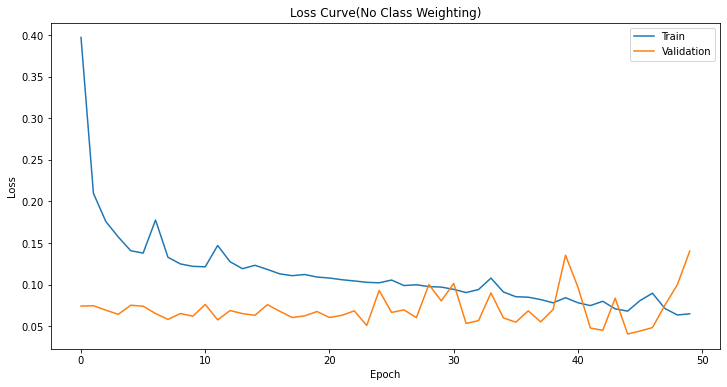

In [129]:
## Loss Curve
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve(No Class Weighting)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('loss_curve1.png')
plt.show()


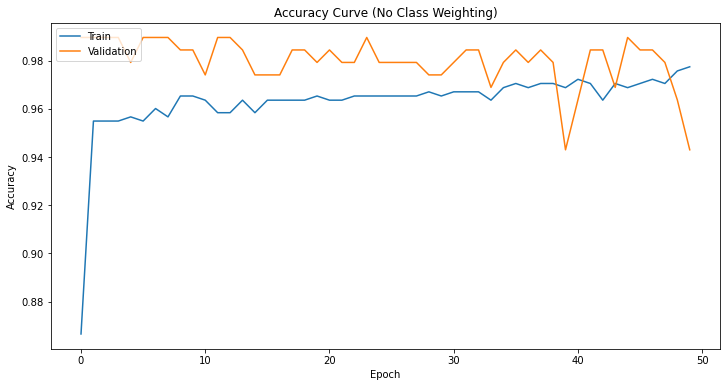

In [130]:
## Accuracy curve
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve (No Class Weighting)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_curve1.png')
plt.show()


7/7 [==============================] - 0s 1ms/step


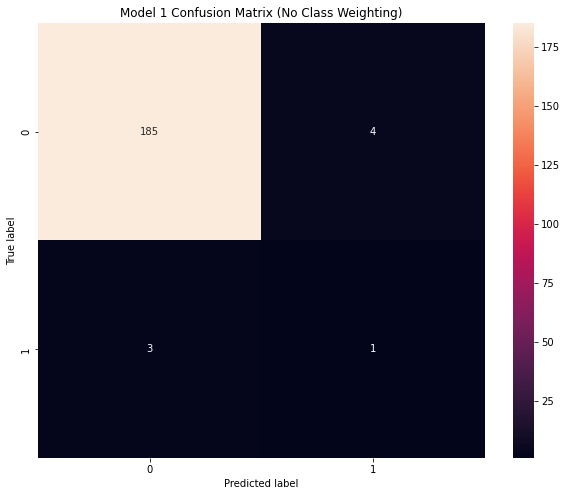

In [143]:
##Plot Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
y_pred_labels = np.array([1 if pred > 0.5 else 0 for pred in y_pred])
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_labels) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Model 1 Confusion Matrix (No Class Weighting)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix1.png')
plt.show()


In [135]:
import numpy as np
# Make predictions on the test set
y_pred = model.predict(X_test)

# To use these for classification, we can convert probabilities to class labels using a threshold
y_pred_labels = [1 if pred > 0.5 else 0 for pred in y_pred]

# Convert y_pred_labels and y_test to numpy arrays
y_pred_labels_np = np.array(y_pred_labels)
y_test_np = np.array(y_test)
y_test_np = np.reshape(y_test_np, (193,))
# Find the indices where the predicted and true labels don't match
misclassified_indices = np.where(y_pred_labels_np != y_test_np)[0]

# Then we can use these indices to get the misclassified samples
misclassified = preprocess_data_reg.iloc[misclassified_indices]

# Create a DataFrame from the misclassified samples
misclassified_df = pd.DataFrame(misclassified)

# Add the true labels to the DataFrame
misclassified_df['True_Labels'] = y_test_np[misclassified_indices]

# Add the predicted labels to the DataFrame
misclassified_df['Predicted_Labels'] = y_pred_labels_np[misclassified_indices]

misclassified_df

7/7 [==============================] - 0s 1ms/step


,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number,True_Labels,Predicted_Labels
43,Boston Celtics,21999,0.426929,0.400569,0.590618,0.549866,0.434884,0.232816,0.540817,0.795813,0.433912,0.416064,0.642455,0.518303,0.563563,0.722122,0.154414,0.535498,1.000000,0,0,0.0,0.328871,0.441430,0.447607,0.00,0,1
48,Boston Celtics,22004,0.501836,0.573924,0.648536,0.639270,0.324545,0.501166,0.635033,0.579552,0.700935,0.638564,0.729825,0.553958,0.393807,0.332331,0.429113,0.510947,0.791783,0,0,0.0,0.421123,0.485577,0.511277,0.25,1,0
58,Boston Celtics,22014,0.388003,0.434686,0.619948,0.626476,0.520930,0.284703,0.422453,0.351293,0.676816,0.356055,0.581895,0.538283,0.538347,0.499249,0.129509,0.293772,0.489708,0,0,0.0,0.454515,0.463401,0.385609,0.00,0,1
91,Charlotte Hornets,22020,0.525719,0.558664,0.830080,0.690237,0.528204,0.410422,0.563640,0.135423,0.378666,0.386453,0.652293,0.446513,0.515397,0.356322,0.403641,0.377478,0.193757,0,0,0.0,0.694852,0.554060,0.439240,0.00,0,1
134,Chicago Bulls,22016,0.502204,0.389745,0.557711,0.831250,0.683537,0.465978,0.327312,0.067277,0.536449,0.447955,0.773380,0.669909,0.647457,0.455822,0.324768,0.367182,0.244228,0,0,0.0,0.494896,0.589419,0.485437,0.25,0,1
136,Chicago Bulls,22019,0.349196,0.397338,0.683511,0.637493,0.437495,0.295119,0.532754,0.366366,0.233645,0.590220,0.699206,0.394108,0.278079,0.723675,0.327093,0.635171,0.698557,0,0,0.0,0.498206,0.535600,0.303243,0.00,1,0
166,Cleveland Cavaliers,22015,0.784181,0.525782,0.720728,0.522009,0.588548,0.265050,0.329269,0.294394,0.649372,0.557014,0.747917,0.606697,0.527770,0.221376,0.259361,0.367043,0.401032,1,0,0.0,0.496076,0.569006,0.742317,0.50,1,0


In [136]:
##Add class weighting so model pays more attention to minority class
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train.winner),
                                                  y=y_train.winner)

class_weights_dict = dict(enumerate(class_weights))
class_weights_dict


{0: 0.5235934664246824, 1: 11.096153846153847}

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

# Initialize the constructor with all layers
model1 = Sequential([
    Dense(256, activation='relu',input_shape=(23,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model, specifying validation data
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),class_weight=class_weights_dict)

# Evaluate the model on test data
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
19/19 [==============================] - 1s 11ms/step - loss: 0.6163 - accuracy: 0.6205 - val_loss: 0.4946 - val_accuracy: 0.8238
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.8371 - val_loss: 0.6774 - val_accuracy: 0.6114
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3782 - accuracy: 0.8336 - val_loss: 0.4007 - val_accuracy: 0.8031
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.7920 - val_loss: 0.2037 - val_accuracy: 0.9067
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.7608 - val_loss: 0.3567 - val_accuracy: 0.7979
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8718 - val_loss: 0.5654 - val_accuracy: 0.6891
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.4229 - val_loss: 0.4236 - val_accuracy: 0.7720
Epoch 8/50
19/19 [=

7/7 [==============================] - 0s 1ms/step


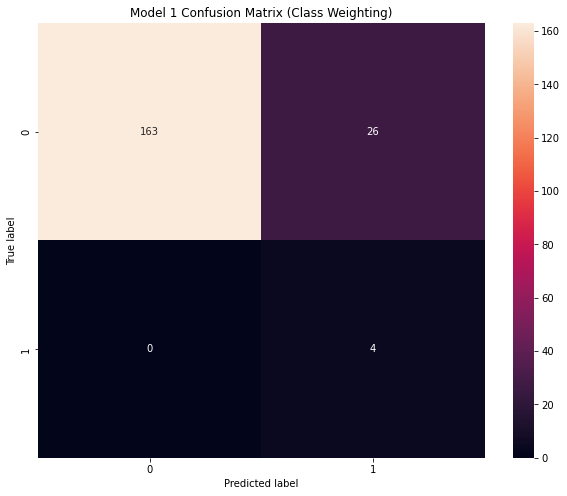

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model1.predict(X_test)
y_pred_labels = np.array([1 if pred > 0.5 else 0 for pred in y_pred])
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_labels) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Model 1 Confusion Matrix (Class Weighting)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix2.png')
plt.show()


In [144]:
prediction_2022_data = preprocess_data_reg[preprocess_data_reg.season_id == 22020]
prediction_2022 = prediction_2022_data.drop(columns=["team_name", "season_id", "winner"])

y_pred = model1.predict(prediction_2022)

# Add the predicted labels to the DataFrame
prediction_2022_data['Predicted_Labels'] = y_pred
# Rank the DataFrame by Predicted_Labels in descending order
prediction_2022_ranked = prediction_2022_data.sort_values(by='Predicted_Labels', ascending=False)

# Print the ranked DataFrame
prediction_2022_ranked.head()




1/1 [==============================] - 0s 26ms/step


/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_36083/747383466.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_2022_data['Predicted_Labels'] = y_pred


,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number,Predicted_Labels
434,Los Angeles Lakers,22020,0.653202,0.695209,0.710549,0.573829,0.598295,0.582369,0.514618,0.175395,0.534787,0.485633,0.683925,0.424747,0.471329,0.511093,0.398120,0.533363,0.346526,0,0,0.000000,0.691901,0.545777,0.682550,0.50,0.919359
521,Milwaukee Bucks,22020,0.713369,0.749218,0.849089,0.608661,0.805408,0.431011,0.382952,0.061813,0.610699,0.708375,0.765688,0.597017,0.748419,0.468777,0.331501,0.353129,0.154893,1,0,0.666667,0.903033,0.853518,0.711806,0.50,0.899419
914,Utah Jazz,22020,0.793791,0.594685,0.870419,0.713163,0.770930,0.566903,0.420708,0.163734,0.726716,0.583695,0.755322,0.777853,0.818532,0.248365,0.350739,0.401827,0.250757,0,0,0.333333,0.798755,0.779855,0.755700,0.50,0.816779
703,Philadelphia 76ers,22020,0.755665,0.691595,0.793355,0.693360,0.680000,0.712221,0.561003,0.296232,0.659398,0.582855,0.758229,0.557978,0.464684,0.607721,0.542756,0.260629,0.379920,0,0,1.000000,0.776849,0.697137,0.666689,0.50,0.352755
375,LA Clippers,22020,0.687728,0.709363,0.955303,1.000000,0.551769,0.360559,0.244651,0.184373,0.686556,0.676256,0.840433,0.871801,0.535305,0.238677,0.215337,0.383633,0.350807,0,0,0.333333,0.790804,0.702208,0.732544,0.25,0.058485


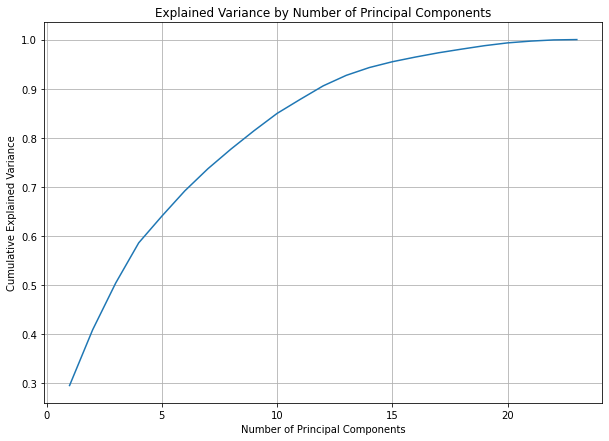

In [145]:
## PCA 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize a new PCA instance
pca = PCA()

# Fit the PCA instance to the standardized training data
pca.fit(X_train)

# Calculate the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()



In [146]:
## GradientBoostingClassifier to test feature importance, avoid overfiitting
from sklearn.ensemble import GradientBoostingClassifier

# assuming you already have X_train and y_train

# Train the GBM model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gbm.fit(X_train, y_train)

# Get the feature importances
feature_importances = gbm.feature_importances_

# Rank the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Print the ranked features and their importance scores
for i in sorted_idx:
    print(f"Feature {i}: {feature_importances[i]}")
# get the column names corresponding to the column indexes
column_names = X_train.columns[sorted_idx]

/Users/Chenjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 21: 0.26148455933887216
Feature 0: 0.16172342839011583
Feature 8: 0.10996168433080758
Feature 19: 0.08590616444423098
Feature 13: 0.0635707557242809
Feature 11: 0.05789782435605817
Feature 10: 0.03210287927046805
Feature 20: 0.03119577232573737
Feature 2: 0.03022207991628622
Feature 7: 0.027935402131784224
Feature 4: 0.025914678584217612
Feature 15: 0.020350506059634246
Feature 6: 0.01621577332058482
Feature 3: 0.015836782562101897
Feature 5: 0.014819270220209969
Feature 14: 0.014201118337928288
Feature 12: 0.0079545904168047
Feature 9: 0.007448165242234012
Feature 1: 0.007011389209149725
Feature 18: 0.004018842131898142
Feature 16: 0.003612906790212523
Feature 17: 0.00040061863820064234
Feature 22: 0.00021480825818191466


In [147]:
# get the column names corresponding to the column indexes
column_names = X_train.columns[sorted_idx]

# print the column names ranked by feature importance
print(column_names)

Index(['elo_score', 'win_loss_pre', 'win_loss_post', 'pre_trade_efficiency',
       'steals_post', 'free_throw_percentage_post',
       'three_point_percentage_post', 'post_trade_efficiency',
       'three_point_percentage_pre', 'personal_fouls_pre', 'rebounds_pre',
       'turnovers_post', 'turnovers_pre', 'free_throw_percentage_pre',
       'blocks_pre', 'blocks_post', 'rebounds_post',
       'field_goal_percentage_post', 'field_goal_percentage_pre',
       'all_defensive', 'personal_fouls_post', 'mvp_number',
       'all_star_number'],
      dtype='object')


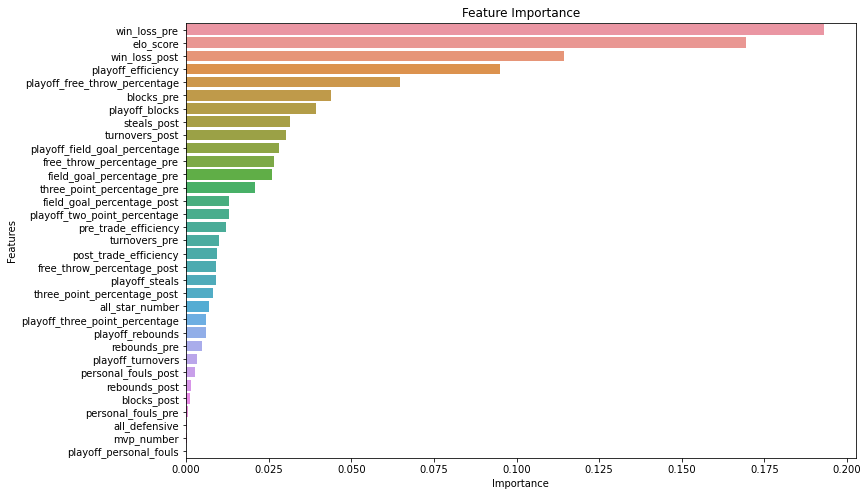

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of feature importances
df_importances = pd.DataFrame({
    'Features': column_names,
    'Importance': feature_importances[sorted_idx]
})

# Sort the DataFrame by importance
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=df_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('Feature_Importance.png')
plt.show()


# Model 2 (Neural Network with input from both regular and playoff season)


In [155]:
##create y_train
model2_y = preprocess_data[['winner']].copy()
##create x_train
model2_x = preprocess_data.drop(columns=["team_name","season_id","winner"])
model2_x.head()

from sklearn.model_selection import train_test_split

# First, split your data into a training set and a temporary set using an 80/20 split
X_temp, X_test, y_temp, y_test = train_test_split(model2_x, model2_y, test_size=0.2, random_state=42)

# Next, split your temporary set into validation and test sets using a 75/25 split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)



(297, 33)
(99, 33)
(99, 33)
(297, 1)
(99, 1)
(99, 1)


In [156]:

from sklearn.ensemble import GradientBoostingClassifier

# assuming you already have X_train and y_train

# Train the GBM model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gbm.fit(X_train, y_train)

# Get the feature importances
feature_importances = gbm.feature_importances_

# Rank the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Print the ranked features and their importance scores
for i in sorted_idx:
    print(f"Feature {i}: {feature_importances[i]}")
    
# get the column names corresponding to the column indexes
column_names = X_train.columns[sorted_idx]

# print the column names
print(column_names)

/Users/Chenjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 0.1929487981750547
Feature 31: 0.16945247892027077
Feature 8: 0.11423933372489803
Feature 28: 0.09490342386514156
Feature 22: 0.06485348601695916
Feature 5: 0.043736000960801415
Feature 25: 0.03927672339703859
Feature 13: 0.03138122992055858
Feature 15: 0.030319418098405965
Feature 19: 0.028074851188826615
Feature 3: 0.0266958992378233
Feature 1: 0.025913624047967605
Feature 2: 0.02076721747180193
Feature 9: 0.013028449048163148
Feature 21: 0.0128525522992569
Feature 29: 0.012163595052915166
Feature 6: 0.00987651912361149
Feature 30: 0.00922906672739052
Feature 11: 0.009181809144474947
Feature 24: 0.009117500363942144
Feature 10: 0.008110965869495213
Feature 32: 0.006997944287541171
Feature 20: 0.006130692059139582
Feature 23: 0.00608969511646669
Feature 4: 0.00496137971976443
Feature 26: 0.0033381461990339323
Feature 16: 0.0025912390684668576
Feature 12: 0.001592143788113142
Feature 14: 0.0010368678419141971
Feature 7: 0.0005691745592475208
Feature 18: 0.0003386567190289489

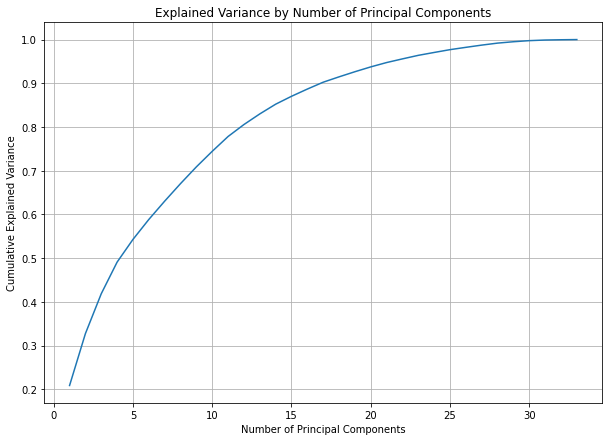

In [157]:
## PCA 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize a new PCA instance
pca = PCA()

# Fit the PCA instance to the standardized training data
pca.fit(X_train)

# Calculate the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

In [158]:
print("Length of column names: ", len(column_names))
print("Length of feature importances: ", len(feature_importances))


Length of column names:  33
Length of feature importances:  33


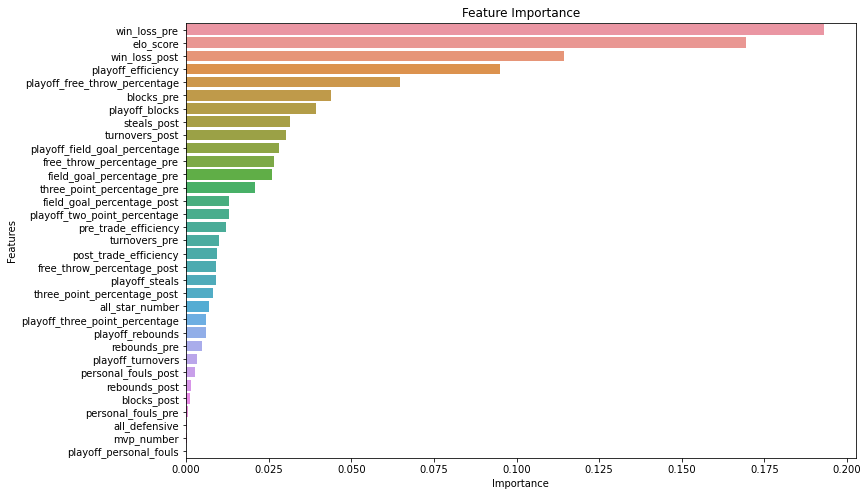

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of feature importances
df_importances = pd.DataFrame({
    'Features': column_names,
    'Importance': feature_importances[sorted_idx]
})

# Sort the DataFrame by importance
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=df_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('Feature_Importance2.png')
plt.show()

In [160]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train.winner),
                                                  y=y_train.winner)

class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 0.5459558823529411, 1: 5.94}

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

# Initialize the constructor with all layers
model2 = Sequential([
    Dense(256, activation='relu',input_shape=(33,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model, specifying validation data
history = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),class_weight=class_weights_dict)

# Evaluate the model on test data
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/50
10/10 [==============================] - 1s 22ms/step - loss: 0.7054 - accuracy: 0.9158 - val_loss: 0.6495 - val_accuracy: 0.8283
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6361 - accuracy: 0.4411 - val_loss: 0.7361 - val_accuracy: 0.3939
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.7508 - val_loss: 0.5300 - val_accuracy: 0.7980
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.7609 - val_loss: 0.5758 - val_accuracy: 0.7374
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.8451 - val_loss: 0.5622 - val_accuracy: 0.7172
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4285 - accuracy: 0.8249 - val_loss: 0.3689 - val_accuracy: 0.7980
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.8215 - val_loss: 0.8267 - val_accuracy: 0.5556
Epoch 8/50
10/10 [=

In [186]:
# # Save the model
# model2.save('model2.h5')

In [87]:

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# tf.random.set_seed(1)

# # Initialize the constructor with all layers
# model2 = Sequential([
#     Dense(256, activation='relu',input_shape=(33,)),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Define a learning rate decay method
# def lr_time_based_decay(epoch, lr):
#     return lr * 0.1**(1/50) # This is an example, tweak this as per requirement

# # Compile the model
# model2.compile(loss='binary_crossentropy',
#                optimizer=Adam(learning_rate=0.001),
#                metrics=['accuracy'])

# # Fit the model, specifying validation data
# history = model2.fit(X_train, y_train, epochs=50, batch_size=32, 
#                      validation_data=(X_val, y_val),
#                      class_weight=class_weights_dict, 
#                      callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1)])
# # Evaluate the model on test data
# score = model2.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


Epoch 1: LearningRateScheduler setting learning rate to 0.0009549926313811498.
Epoch 1/50
10/10 [==============================] - 1s 29ms/step - loss: 0.7083 - accuracy: 0.9158 - val_loss: 0.6736 - val_accuracy: 0.6364 - lr: 9.5499e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009120108560579491.
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.3165 - val_loss: 0.7240 - val_accuracy: 0.4646 - lr: 9.1201e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008709635947074791.
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5868 - accuracy: 0.7710 - val_loss: 0.5091 - val_accuracy: 0.8081 - lr: 8.7096e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0008317637967024216.
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5316 - accuracy: 0.7643 - val_loss: 0.5861 - val_accuracy: 0.7172 - lr: 8.3176e-04

Epoch 5: LearningRateScheduler setting learning ra

Epoch 35/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.9192 - val_loss: 0.3836 - val_accuracy: 0.7879 - lr: 1.9953e-04

Epoch 36: LearningRateScheduler setting learning rate to 0.00019054606868934912.
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.8384 - val_loss: 0.3397 - val_accuracy: 0.8081 - lr: 1.9055e-04

Epoch 37: LearningRateScheduler setting learning rate to 0.0001819700810256345.
Epoch 37/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9226 - val_loss: 0.2429 - val_accuracy: 0.8687 - lr: 1.8197e-04

Epoch 38: LearningRateScheduler setting learning rate to 0.00017378008173576394.
Epoch 38/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9057 - val_loss: 0.3510 - val_accuracy: 0.7980 - lr: 1.7378e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.00016595868570882196.
Epoch 39/50
10/10 [======================

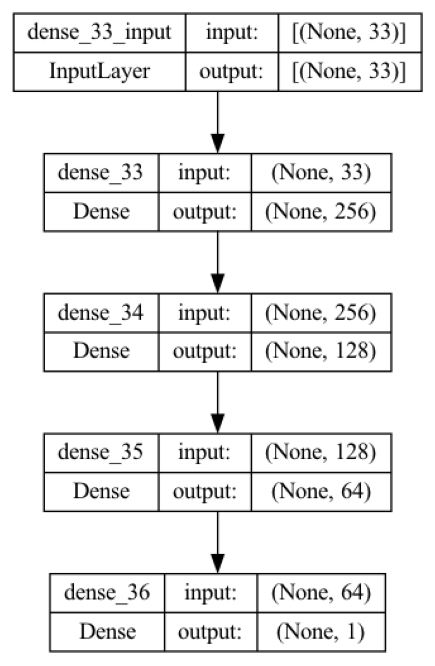

In [88]:
# from tensorflow.keras.utils import plot_model
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Generate a plot of the model's layers
# plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

# # Load the image file
# img = mpimg.imread('model2_plot.png')

# # Create a new matplotlib figure
# plt.figure(figsize=(12, 12))

# # Remove the axes for visual appeal
# plt.axis('off')

# # Display the image
# plt.imshow(img)
# plt.show()


In [55]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import LearningRateScheduler

# tf.random.set_seed(1)

# # Initialize the constructor with all layers
# model2 = Sequential([
#     Dense(512, activation='relu',input_shape=(33,)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Define a learning rate decay method
# def lr_time_based_decay(epoch, lr):
#     return lr * 0.1**(1/50) # This is an example, tweak this as per requirement

# # Compile the model
# model2.compile(loss='binary_crossentropy',
#                optimizer=Adam(learning_rate=0.001),
#                metrics=['accuracy'])

# # Fit the model, specifying validation data
# history = model2.fit(X_train, y_train, epochs=50, batch_size=32, 
#                      validation_data=(X_val, y_val),
#                      class_weight=class_weights_dict, 
#                      callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1)])

# # Evaluate the model on test data
# score = model2.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])



Epoch 1: LearningRateScheduler setting learning rate to 0.0009549926313811498.
Epoch 1/50
10/10 [==============================] - 2s 28ms/step - loss: 1.3191 - accuracy: 0.4949 - val_loss: 0.6627 - val_accuracy: 0.9495 - lr: 9.5499e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009120108560579491.
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.8595 - accuracy: 0.5387 - val_loss: 0.6954 - val_accuracy: 0.4848 - lr: 9.1201e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008709635947074791.
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.7702 - accuracy: 0.5320 - val_loss: 0.7306 - val_accuracy: 0.0606 - lr: 8.7096e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0008317637967024216.
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.8738 - accuracy: 0.5152 - val_loss: 0.7900 - val_accuracy: 0.0404 - lr: 8.3176e-04

Epoch 5: LearningRateScheduler setting learning ra

Epoch 35/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5051 - accuracy: 0.6835 - val_loss: 0.7215 - val_accuracy: 0.5859 - lr: 1.9953e-04

Epoch 36: LearningRateScheduler setting learning rate to 0.00019054606868934912.
Epoch 36/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4577 - accuracy: 0.7071 - val_loss: 0.7041 - val_accuracy: 0.6061 - lr: 1.9055e-04

Epoch 37: LearningRateScheduler setting learning rate to 0.0001819700810256345.
Epoch 37/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5336 - accuracy: 0.6734 - val_loss: 0.6933 - val_accuracy: 0.6061 - lr: 1.8197e-04

Epoch 38: LearningRateScheduler setting learning rate to 0.00017378008173576394.
Epoch 38/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4722 - accuracy: 0.7407 - val_loss: 0.6826 - val_accuracy: 0.6061 - lr: 1.7378e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.00016595868570882196.
Epoch 39/50
10/10 [======================

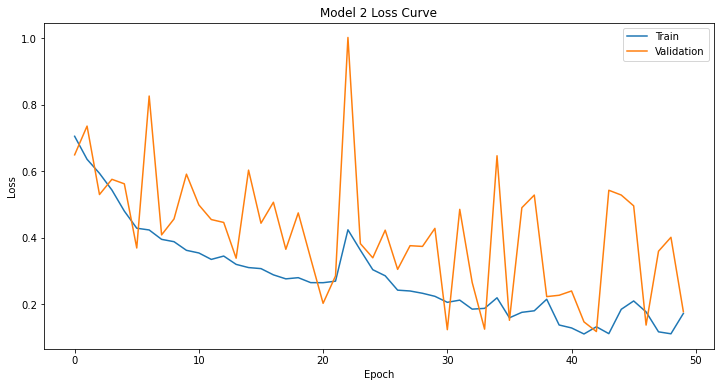

In [169]:
## Loss Curve
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 2 Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss_curve2.png')
plt.show()


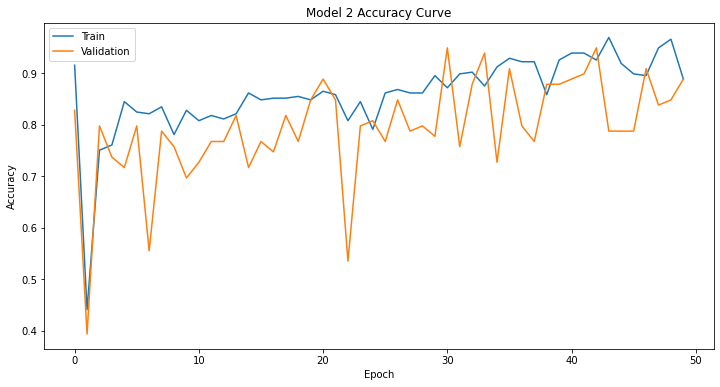

In [170]:
## Accuracy curve
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Accuracy_curve2.png')
plt.show()


4/4 [==============================] - 0s 1ms/step


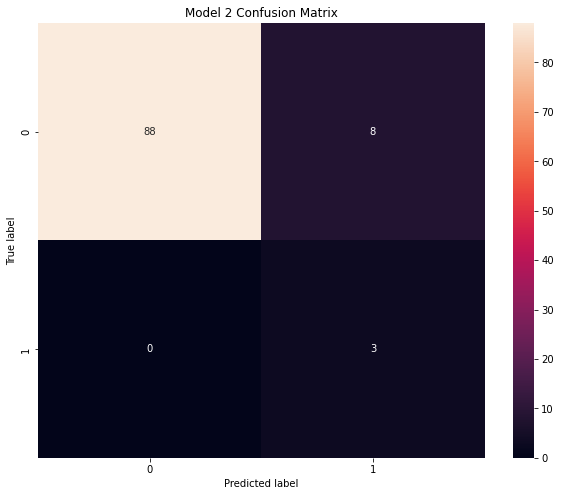

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model2.predict(X_test)
y_pred_labels = np.array([1 if pred > 0.5 else 0 for pred in y_pred])
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_labels) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Model 2 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix3.png')
plt.show()

4/4 [==============================] - 0s 1ms/step


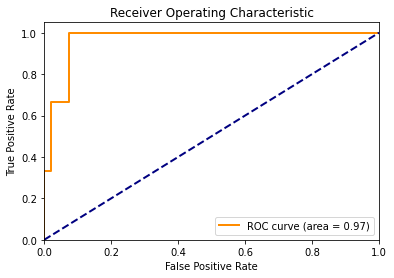

0.96875

In [172]:
y_pred_prob = model2.predict(X_test)

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_value = auc(fpr, tpr)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Model 2 ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()
auc_value

In [173]:
prediction_2022_data = preprocess_data[preprocess_data.season_id == 22021]
prediction_2022 = prediction_2022_data.drop(columns=["team_name", "season_id", "winner"])
print(prediction_2022.shape)
y_pred = model2.predict(prediction_2022)

# Add the predicted labels to the DataFrame
prediction_2022_data['Predicted_Labels'] = y_pred.round(2)
# Rank the DataFrame by Predicted_Labels in descending order
prediction_2022_ranked = prediction_2022_data.sort_values(by='Predicted_Labels', ascending=False)

# Print the ranked DataFrame
prediction_2022_ranked

(16, 33)
1/1 [==============================] - 0s 19ms/step


/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_36083/3998873591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_2022_data['Predicted_Labels'] = y_pred.round(2)


,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,playoff_field_goal_percentage,playoff_three_point_percentage,playoff_two_point_percentage,playoff_free_throw_percentage,playoff_rebounds,playoff_steals,playoff_blocks,playoff_turnovers,playoff_personal_fouls,playoff_efficiency,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number,Predicted_Labels
157,Golden State Warriors,22021,0.667501,0.496756,0.713217,0.654479,0.629510,0.360097,0.610068,0.319800,0.213675,0.598297,0.760970,0.715838,0.565206,0.441683,0.203508,0.414589,0.612652,1,0.0,0.333333,0.643979,0.742857,0.902439,0.638225,0.645299,0.602410,0.449438,0.438849,0.245810,0.812749,0.728241,0.743766,0.566123,0.25,0.89
388,Phoenix Suns,22021,0.817332,0.633415,0.699879,0.785152,0.632957,0.228514,0.303399,0.220909,0.617284,0.770744,0.778642,0.797936,0.526701,0.631530,0.329420,0.276624,0.498624,0,0.0,0.333333,0.732984,0.708571,0.912195,0.812287,0.487179,0.469880,0.314607,0.352518,0.301676,0.733068,0.785963,0.938156,0.698289,0.25,0.62
112,Dallas Mavericks,22021,0.418725,0.389137,0.607703,0.687031,0.492965,0.201890,0.255291,0.263728,0.662393,0.625066,0.789956,0.704090,0.378900,0.172561,0.180957,0.203056,0.366843,0,0.0,0.000000,0.481675,0.757143,0.707317,0.655290,0.329060,0.542169,0.202247,0.129496,0.223464,0.552457,0.535309,0.618497,0.408269,0.25,0.02
478,Utah Jazz,22021,0.469046,0.553739,0.704286,0.725121,0.628361,0.367121,0.457212,0.178551,0.370370,0.550844,0.727947,0.577505,0.726041,0.456751,0.361994,0.385926,0.312219,0,0.0,0.333333,0.450262,0.454286,0.829268,0.706485,0.683761,0.156627,0.303371,0.244604,0.273743,0.488712,0.675343,0.740761,0.584418,0.75,0.02
41,Boston Celtics,22021,0.356531,0.366780,0.599835,0.895544,0.665620,0.577171,0.449846,0.153393,0.726496,0.798895,0.816712,0.886010,0.602007,0.379097,0.468487,0.244331,0.274665,0,0.0,0.666667,0.481675,0.737143,0.658537,0.744027,0.602564,0.445783,0.595506,0.453237,0.201117,0.673307,0.616392,1.000000,0.433844,0.50,0.01
284,Milwaukee Bucks,22021,0.461824,0.436198,0.711090,0.691176,0.663878,0.226805,0.388769,0.088245,0.511111,0.700070,0.777053,0.687749,0.726395,0.405884,0.143747,0.284574,0.304408,0,0.0,0.666667,0.424084,0.605714,0.609756,0.518771,0.923077,0.433735,0.393258,0.388489,0.117318,0.604250,0.662469,0.903941,0.440370,0.25,0.01
19,Atlanta Hawks,22021,0.230991,0.520609,0.751652,0.821580,0.524186,0.259940,0.220364,0.129611,0.456349,0.599761,0.773428,0.943406,0.499489,0.482365,0.226462,0.023954,0.349944,0,0.0,0.000000,0.434555,0.602857,0.760976,0.692833,0.452991,0.373494,0.157303,0.575540,0.251397,0.374502,0.669675,0.841735,0.319404,0.00,0.00
48,Brooklyn Nets,22021,0.310734,0.528766,0.655176,0.883275,0.551379,0.479504,0.415263,0.266951,0.370370,0.732237,0.798920,0.744831,0.520056,0.408536,0.448859,0.500195,0.534130,0,0.0,0.000000,0.764398,0.877143,0.834146,0.542662,0.222222,0.638554,0.617978,0.496403,0.430168,0.645418,0.666207,0.816155,0.345228,0.50,0.00
78,Chicago Bulls,22021,0.469046,0.620843,0.756279,0.869084,0.431885,0.303436,0.294077,0.158293,0.185185,0.652042,0.715422,0.828101,0.376088,0.366348,0.095971,0.261720,0.324054,0,0.0,0.000000,0.246073,0.480000,0.541463,0.866894,0.649573,0.614458,0.247191,0.330935,0.083799,0.446215,0.675017,0.608479,0.325304,0.25,0.00
129,Denver Nuggets,22021,0.359986,0.572864,0.664751,0.755873,0.469184,0.118766,0.419752,0.215896,0.515873,0.825617,0.705449,0.856292,0.623365,0.395190,0.195051,0.661131,0.518279,0,1.0,0.000000,0.623037,0.691429,0.843902,0.733788,0.555556,0.518072,0.269663,0.575540,0.441341,0.687915,0.654387,0.928977,0.417326,0.25,0.00


In [77]:
# from sklearn.utils import resample

# # concatenate our training data back together
# X = pd.concat([X_train, y_train], axis=1)

# # separate minority and majority classes
# majority = X[X.target==0]
# minority = X[X.target==1]

# # downsample majority
# majority_downsampled = resample(majority,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(minority), # match minority n
#                                 random_state = 1) # reproducible results

# # combine minority and downsampled majority
# downsampled = pd.concat([majority_downsampled, minority]) # new training dataset

# # checking counts
# print(downsampled.target.value_counts())

# # separate the features and target variable from the downsampled dataset
# X_train_downsampled = downsampled.drop('target', axis=1)
# y_train_downsampled = downsampled.target


# Predicting the champion of the 2022-2023 NBA season

In [174]:
##clean the data for playoff 2023
playoff_2023 = pd.read_csv("playoff2023.csv")
playoff_2023.columns
playoff_2023['PTS\\'].dtypes
playoff_2023['PTS\\'] = playoff_2023['PTS\\'].str.replace('\\', '')  # Remove backslashes
playoff_2023['PTS\\'] = playoff_2023['PTS\\'].str.replace('}', '')  # Remove closing curly braces
playoff_2023['PTS\\'] = pd.to_numeric(playoff_2023['PTS\\'])  # Convert to numeric
playoff_2023.rename(columns={'Team': 'team_name', 'PTS\\': 'PTS'}, inplace=True)
playoff_2023 = playoff_2023.drop(columns=["Rk"])
playoff_2023.head()


/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_36083/3639555961.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playoff_2023['PTS\\'] = playoff_2023['PTS\\'].str.replace('\\', '')  # Remove backslashes
/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_36083/3639555961.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playoff_2023['PTS\\'] = playoff_2023['PTS\\'].str.replace('}', '')  # Remove closing curly braces


,team_name,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Milwaukee Bucks,5,245.0,44.0,92.6,0.475,15.6,41.2,0.379,28.4,51.4,0.553,15.2,21.4,0.710,10.2,34.2,44.4,26.8,6.6,3.6,14.4,18.8,118.8
1,Denver Nuggets,15,241.7,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,0.548,17.9,21.9,0.815,10.5,33.7,44.2,25.9,7.1,3.9,11.4,20.5,116.4
2,Atlanta Hawks,6,240.0,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,0.508,13.8,17.0,0.814,12.2,31.7,43.8,24.5,7.7,4.8,12.8,16.3,115.8
3,Los Angeles Clippers,5,240.0,40.8,88.6,0.460,12.2,33.8,0.361,28.6,54.8,0.522,21.8,26.4,0.826,11.8,28.2,40.0,21.6,6.6,4.2,14.0,23.0,115.6
4,Phoenix Suns,11,240.0,43.1,86.8,0.496,9.4,25.8,0.363,33.7,61.0,0.553,18.6,23.4,0.798,9.2,30.8,40.0,24.5,6.3,5.6,12.1,22.0,114.2


In [175]:
## Combine the regular and playoff data
regular_2023 = final_data_reg[final_data_reg.season_id == 22022]
data_2023 = regular_2023.merge(playoff_2023, on=['team_name'], how= "inner")
data_2023

data_2023['playoff_eff'] = (data_2023['PTS'] + data_2023['TRB'] + data_2023['AST'] +
                            data_2023['STL'] + data_2023['BLK'] -
                            (data_2023['FGA'] - data_2023['FG']) -
                            (data_2023['FTA'] - data_2023['FT']) -
                            data_2023['TOV'])

data_2023['pretrade_eff'] = (data_2023['pts_pre'] + data_2023['reb_pre'] + data_2023['ast_pre'] +
                            data_2023['stl_pre'] + data_2023['blk_pre'] -
                            (data_2023['fga_pre'] - data_2023['fgm_pre']) -
                            (data_2023['fta_pre'] - data_2023['ftm_pre']) -
                            data_2023['tov_pre'])

data_2023['posttrade_eff'] = (data_2023['pts_post'] + data_2023['reb_post'] +
                              data_2023['ast_post'] + data_2023['stl_post'] +
                              data_2023['blk_post'] -
                              (data_2023['fga_post'] - data_2023['fgm_post']) -
                              (data_2023['fta_post'] - data_2023['ftm_post']) -
                              data_2023['tov_post'])


In [176]:

data_2023

,team_name,team_abbreviation,season_id,team_id_pre,wl_pre,fgm_pre,fga_pre,fg_pct_pre,fg3m_pre,fg3a_pre,fg3_pct_pre,ftm_pre,fta_pre,ft_pct_pre,oreb_pre,dreb_pre,reb_pre,ast_pre,stl_pre,blk_pre,tov_pre,pf_pre,pts_pre,plus_minus_pre,game_id_pre,games_played_pre,team_id_post,wl_post,fgm_post,fga_post,fg_pct_post,fg3m_post,fg3a_post,fg3_pct_post,ftm_post,fta_post,ft_pct_post,oreb_post,dreb_post,reb_post,ast_post,stl_post,blk_post,tov_post,pf_post,pts_post,plus_minus_post,game_id_post,games_played_post,winner,mvp_number,all_defensive,pretrade_eff,posttrade_eff,elo_score,all_star_number,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,playoff_eff
0,Atlanta Hawks,ATL,22022,1.610613e+09,0.500000,43.875000,91.732143,0.479839,10.642857,30.607143,0.349482,17.732143,21.785714,0.815232,10.535714,33.375000,43.910714,24.553571,6.910714,4.892857,12.928571,19.267857,116.125000,-0.232143,2.220042e+07,56.0,1.610613e+09,0.500000,46.500000,93.166667,0.500167,11.416667,29.333333,0.389500,18.250000,21.750000,0.841250,11.250000,31.000000,42.250000,25.333333,7.750000,4.416667,12.083333,18.083333,122.666667,1.333333,2.220093e+07,12.0,0,0,0,131.553571,140.166667,1517.288861,1,6,240.0,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,0.508,13.8,17.0,0.814,12.2,31.7,43.8,24.5,7.7,4.8,12.8,16.3,115.8,128.3
1,Boston Celtics,BOS,22022,1.610613e+09,0.709091,41.636364,87.890909,0.474764,15.581818,41.654545,0.372818,18.527273,22.381818,0.828836,9.509091,35.490909,45.000000,26.145455,6.200000,5.345455,13.527273,18.927273,117.381818,5.981818,2.220041e+07,55.0,1.610613e+09,0.666667,41.076923,85.076923,0.477615,16.153846,40.769231,0.393308,13.615385,17.692308,0.781769,9.076923,33.692308,42.769231,25.923077,6.384615,4.615385,12.153846,18.769231,111.923077,3.384615,2.220092e+07,13.0,0,0,1,136.436364,131.384615,1646.704054,1,19,241.3,41.3,85.7,0.482,14.3,38.5,0.372,27.0,47.2,0.572,16.5,20.4,0.809,9.4,33.8,43.2,24.5,6.0,6.5,12.3,17.4,113.4,133.0
2,Brooklyn Nets,BKN,22022,1.610613e+09,0.600000,42.581818,84.400000,0.505600,12.509091,31.909091,0.391836,16.745455,21.109091,0.792018,7.745455,32.672727,40.418182,25.981818,6.981818,6.600000,14.381818,21.909091,114.418182,2.000000,2.220041e+07,55.0,1.610613e+09,0.416667,38.769231,87.076923,0.447077,14.076923,38.846154,0.365923,19.615385,23.692308,0.838154,7.923077,31.230769,39.153846,23.076923,7.923077,5.153846,12.000000,20.230769,111.230769,-3.692308,2.220094e+07,13.0,0,0,0,133.836364,122.153846,1544.025592,0,4,240.0,34.0,77.3,0.440,11.3,34.5,0.326,22.8,42.8,0.532,13.3,18.3,0.726,5.8,29.3,35.0,22.3,5.3,3.8,12.3,15.5,92.5,98.3
3,Cleveland Cavaliers,CLE,22022,1.610613e+09,0.614035,41.140351,84.456140,0.489035,11.578947,31.578947,0.368281,17.947368,23.140351,0.777228,9.596491,32.596491,42.192982,24.947368,6.929825,4.350877,13.982456,18.719298,111.807018,5.649123,2.220042e+07,57.0,1.610613e+09,0.615385,42.230769,86.538462,0.489308,11.153846,32.000000,0.342077,17.307692,21.923077,0.789308,10.307692,29.153846,39.461538,24.538462,8.538462,4.846154,12.076923,19.384615,112.923077,4.076923,2.220092e+07,13.0,0,0,1,127.736842,129.307692,1571.849999,2,5,240.0,35.2,78.4,0.449,10.0,30.6,0.327,25.2,47.8,0.527,13.8,18.6,0.742,9.2,28.0,37.2,22.0,6.8,4.0,15.8,20.4,94.2,100.4
4,Denver Nuggets,DEN,22022,1.610613e+09,0.678571,43.892857,86.107143,0.510839,12.232143,30.946429,0.392554,17.107143,22.875000,0.749768,9.821429,32.821429,42.642857,28.839286,7.660714,4.446429,15.017857,19.232143,117.125000,4.107143,2.220043e+07,56.0,1.610613e+09,0.666667,44.000000,88.416667,0.498167,12.083333,33.416667,0.357000,15.916667,20.333333,0.775750,11.333333,33.750000,45.083333,31.166667,7.000000,4.250000,13.500000,16.666667,116.000000,3.000000,2.220093e+07,12.0,0,0,0,137.714286,141.166667,1578.803513,1,15,241.7,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,0.548,17.9,21.9,0.815,10.5,33.7,44.2,25.9,7.1,3.9,11.4,20.5,116.4,137.2
5,Golden State Warriors,GSW,22022,1.610613e+09,0.509091,42.981818,90.145455,0.477491,16.654545,43.218182,0.384909,15.

In [177]:
##Preprocessing
data_2023 = data_2023[['team_name', 'season_id', 'wl_pre', 'fg_pct_pre', 'fg3_pct_pre',
                                    'ft_pct_pre', 'reb_pre', 'blk_pre', 'tov_pre', 'pf_pre', 'wl_post',
                                    'fg_pct_post', 'fg3_pct_post', 'ft_pct_post', 'reb_post', 'stl_post',
                                    'blk_post', 'tov_post', 'pf_post', 'winner', 'mvp_number',
                                    'all_defensive', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'STL', 'BLK', 'TOV',
                                    'PF', 'playoff_eff', 'pretrade_eff', 'posttrade_eff',"elo_score",'all_star_number']]

data_2023 = data_2023.rename(columns={
    'team_name': 'team_name', 
    'season_id': 'season_id', 
    'wl_pre': 'win_loss_pre',
    'fg_pct_pre': 'field_goal_percentage_pre', 
    'fg3_pct_pre': 'three_point_percentage_pre',
    'ft_pct_pre': 'free_throw_percentage_pre', 
    'reb_pre': 'rebounds_pre', 
    'blk_pre': 'blocks_pre', 
    'tov_pre': 'turnovers_pre',
    'pf_pre': 'personal_fouls_pre', 
    'wl_post': 'win_loss_post',
    'fg_pct_post': 'field_goal_percentage_post', 
    'fg3_pct_post': 'three_point_percentage_post', 
    'ft_pct_post': 'free_throw_percentage_post',
    'reb_post': 'rebounds_post', 
    'stl_post': 'steals_post',
    'blk_post': 'blocks_post', 
    'tov_post': 'turnovers_post', 
    'pf_post': 'personal_fouls_post',
    'winner': 'winner', 
    'mvp_number': 'mvp_number',
    'all_defensive': 'all_defensive', 
    'FG%': 'playoff_field_goal_percentage', 
    '3P%': 'playoff_three_point_percentage',
    '2P%': 'playoff_two_point_percentage', 
    'FT%': 'playoff_free_throw_percentage', 
    'TRB': 'playoff_rebounds',
    'STL': 'playoff_steals', 
    'BLK': 'playoff_blocks', 
    'TOV': 'playoff_turnovers',
    'PF': 'playoff_personal_fouls', 
    'playoff_eff': 'playoff_efficiency', 
    'pretrade_eff': 'pre_trade_efficiency',
    'posttrade_eff': 'post_trade_efficiency'
})

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns that you want to scale and normalize
columns_to_scale = ['win_loss_pre', 'field_goal_percentage_pre', 'three_point_percentage_pre', 'free_throw_percentage_pre',
'rebounds_pre', 'blocks_pre', 'turnovers_pre', 'personal_fouls_pre', 'win_loss_post',
'field_goal_percentage_post', 'three_point_percentage_post', 'free_throw_percentage_post',
'rebounds_post', 'steals_post', 'blocks_post', 'turnovers_post', 'personal_fouls_post',
'mvp_number', 'all_defensive', 'playoff_field_goal_percentage', 'playoff_three_point_percentage',
'playoff_two_point_percentage', 'playoff_free_throw_percentage', 'playoff_rebounds', 'playoff_steals',
'playoff_blocks', 'playoff_turnovers', 'playoff_personal_fouls', 'playoff_efficiency',
'pre_trade_efficiency', 'post_trade_efficiency', 'elo_score', 'all_star_number']

# Initialize a scaler with the StandardScaler function
scaler = StandardScaler()

# Scale the data
data_2023[columns_to_scale] = scaler.fit_transform(data_2023[columns_to_scale])

# Normalize the data
scaler = MinMaxScaler()
data_2023[columns_to_scale] = scaler.fit_transform(data_2023[columns_to_scale])

x_2023 = data_2023.drop(columns=["team_name","season_id","winner"])



In [178]:
x_2023.head()

,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,mvp_number,all_defensive,playoff_field_goal_percentage,playoff_three_point_percentage,playoff_two_point_percentage,playoff_free_throw_percentage,playoff_rebounds,playoff_steals,playoff_blocks,playoff_turnovers,playoff_personal_fouls,playoff_efficiency,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number
0,0.203956,0.460300,0.263724,0.861708,0.401860,0.537474,0.000000,0.225281,0.239130,0.652023,0.755167,0.798400,0.343528,0.752788,0.493274,0.345072,0.256024,0.0,0.0,0.585106,0.882979,0.412844,0.590909,0.692913,1.000000,0.433333,0.318182,0.108108,0.771208,0.644183,0.720835,0.303868,0.5
1,1.000000,0.371934,0.662637,1.000000,0.527197,0.660099,0.168064,0.133005,0.637681,0.375059,0.799560,0.460277,0.401138,0.397484,0.546740,0.357868,0.379981,0.0,0.5,0.851064,0.851064,1.000000,0.562500,0.645669,0.291667,1.000000,0.204545,0.256757,0.892031,0.926193,0.445884,1.000000,0.5
2,0.584672,0.908786,0.987740,0.625730,0.000000,1.000000,0.407948,0.940887,0.039855,0.000000,0.480290,0.780800,0.000000,0.797827,0.691618,0.329949,0.644115,0.0,0.0,0.404255,0.361702,0.633028,0.090909,0.000000,0.000000,0.100000,0.204545,0.000000,0.000000,0.776028,0.156885,0.447687,0.0
3,0.638106,0.620396,0.585072,0.475384,0.204213,0.390632,0.295841,0.076657,0.515050,0.518658,0.202275,0.503130,0.034139,0.957964,0.608831,0.343909,0.491196,0.0,0.5,0.500000,0.372340,0.587156,0.181818,0.173228,0.625000,0.166667,1.000000,0.662162,0.053985,0.423745,0.380860,0.597356,1.0
4,0.883807,1.000000,1.000000,0.196241,0.255977,0.416520,0.586493,0.215605,0.637681,0.627460,0.376259,0.426060,0.657895,0.557621,0.448430,0.602157,0.000000,0.0,0.0,0.936170,1.000000,0.779817,0.596591,0.724409,0.750000,0.133333,0.000000,0.675676,1.000000,1.000000,0.752143,0.634759,0.5


In [179]:
y_pred = model2.predict(x_2023)

# Add the predicted labels to the DataFrame
data_2023['Predicted_Labels'] = y_pred.round(4)
# Rank the DataFrame by Predicted_Labels in descending order
data_2023_ranked = data_2023.sort_values(by='Predicted_Labels', ascending=False)

# Print the ranked DataFrame
data_2023_ranked

1/1 [==============================] - 0s 19ms/step


,team_name,season_id,win_loss_pre,field_goal_percentage_pre,three_point_percentage_pre,free_throw_percentage_pre,rebounds_pre,blocks_pre,turnovers_pre,personal_fouls_pre,win_loss_post,field_goal_percentage_post,three_point_percentage_post,free_throw_percentage_post,rebounds_post,steals_post,blocks_post,turnovers_post,personal_fouls_post,winner,mvp_number,all_defensive,playoff_field_goal_percentage,playoff_three_point_percentage,playoff_two_point_percentage,playoff_free_throw_percentage,playoff_rebounds,playoff_steals,playoff_blocks,playoff_turnovers,playoff_personal_fouls,playoff_efficiency,pre_trade_efficiency,post_trade_efficiency,elo_score,all_star_number,Predicted_Labels
4,Denver Nuggets,22022,0.883807,1.000000,1.000000,0.196241,0.255977,0.416520,0.586493,0.215605,0.637681,0.627460,0.376259,0.426060,0.657895,0.557621,0.448430,0.602157,0.000000,0,0.0,0.0,0.936170,1.000000,0.779817,0.596591,0.724409,0.750000,0.133333,0.000000,0.675676,1.000000,1.000000,0.752143,0.634759,0.5,0.7233
1,Boston Celtics,22022,1.000000,0.371934,0.662637,1.000000,0.527197,0.660099,0.168064,0.133005,0.637681,0.375059,0.799560,0.460277,0.401138,0.397484,0.546740,0.357868,0.379981,0,0.0,0.5,0.851064,0.851064,1.000000,0.562500,0.645669,0.291667,1.000000,0.204545,0.256757,0.892031,0.926193,0.445884,1.000000,0.5,0.7187
8,Miami Heat,22022,0.377009,0.000000,0.000000,0.949358,0.117155,0.000000,0.111921,0.098522,0.068323,0.109589,0.285487,0.876969,0.014631,0.520446,0.285074,0.848441,0.408778,0,0.0,0.5,0.734043,0.989362,0.587156,0.534091,0.464567,0.875000,0.000000,0.204545,0.675676,0.694087,0.000000,0.000000,0.381686,0.5,0.4796
9,Milwaukee Bucks,22022,0.930779,0.182327,0.400628,0.105819,1.000000,0.566502,0.612104,0.000000,1.000000,0.526138,0.977654,0.214309,0.842817,0.210657,0.538117,0.496299,0.075301,0,0.0,1.0,0.776596,0.925532,0.825688,0.000000,0.740157,0.541667,0.033333,0.681818,0.445946,0.840617,0.567057,0.603429,0.639443,1.0,0.2291
0,Atlanta Hawks,22022,0.203956,0.460300,0.263724,0.861708,0.401860,0.537474,0.000000,0.225281,0.239130,0.652023,0.755167,0.798400,0.343528,0.752788,0.493274,0.345072,0.256024,0,0.0,0.0,0.585106,0.882979,0.412844,0.590909,0.692913,1.000000,0.433333,0.318182,0.108108,0.771208,0.644183,0.720835,0.303868,0.5,0.0090
13,Phoenix Suns,22022,0.304144,0.170798,0.773110,0.621979,0.410115,0.585516,0.335239,0.680321,0.717391,0.561549,0.383254,0.549700,0.770697,0.921933,0.542601,0.529569,1.000000,0,0.0,0.0,1.000000,0.755319,0.825688,0.500000,0.393701,0.416667,0.700000,0.159091,0.878378,0.814910,0.501766,0.775102,0.594100,0.5,0.0081
6,Los Angeles Lakers,22022,0.000000,0.521855,0.127885,0.432767,0.529251,0.435873,0.315804,0.026918,0.637681,0.257991,0.230525,0.505644,1.000000,0.340768,0.627803,0.828997,0.105422,0,0.0,0.0,0.734043,0.457447,0.743119,0.562500,0.755906,0.625000,0.966667,0.113636,0.256757,0.876607,0.669967,0.436452,0.000000,0.5,0.0060
12,Philadelphia 76ers,22022,0.742706,0.493318,0.788953,0.940863,0.025697,0.494934,0.274283,0.566781,0.922360,0.648222,1.000000,1.000000,0.133509,0.501859,0.534914,0.304025,0.692771,0,1.0,0.0,0.372340,0.712766,0.247706,1.000000,0.629921,0.958333,0.600000,0.227273,0.432432,0.444730,0.601314,0.677600,0.697529,0.5,0.0017
7,Memphis Grizzlies,22022,0.626974,0.285454,0.187421,0.000000,0.883039,0.842456,0.441123,0.453749,0.565217,0.156482,0.000000,0.379420,0.557869,0.817844,0.894823,0.000000,0.651698,0,0.0,1.0,0.000000,0.212766,0.000000,0.710227,0.905512,0.583333,0.000000,0.363636,0.675676,0.339332,0.740557,0.448074,0.757392,0.5,0.0007
11,New York Knicks,22022,0.339926,0.102468,0.159327,0.391924,0.771705,0.295567,0.020051,0.641362,0.698997,0.508739,0.448709,0.224460,0.490144,0.000000,0.188981,0.174402,0.344234,0,0.0,0.0,0.329787,0.000000,0.596330,0.204545,0.818898,0.708333,0.333333,0.727273,0.540541,0.251928,0.367781,0.167723,0.442444,0.0,0.0004


In [185]:
data_2023_ranked[["team_name","Predicted_Labels"]]

#dfi.export(data_2023_ranked[["team_name","Predicted_Labels"]], 'prediction_2023.png')

,team_name,Predicted_Labels
4,Denver Nuggets,0.7233
1,Boston Celtics,0.7187
8,Miami Heat,0.4796
9,Milwaukee Bucks,0.2291
0,Atlanta Hawks,0.0090
13,Phoenix Suns,0.0081
6,Los Angeles Lakers,0.0060
12,Philadelphia 76ers,0.0017
7,Memphis Grizzlies,0.0007
11,New York Knicks,0.0004


In [180]:
# column_names = [
#     'win_loss_pre',
#     'field_goal_percentage_pre',
#     'three_point_percentage_pre',
#     'free_throw_percentage_pre',
#     'rebounds_pre',
#     'blocks_pre',
#     'turnovers_pre',
#     'personal_fouls_pre',
#     'win_loss_post',
#     'field_goal_percentage_post',
#     'three_point_percentage_post',
#     'free_throw_percentage_post',
#     'rebounds_post',
#     'steals_post',
#     'blocks_post',
#     'turnovers_post',
#     'personal_fouls_post',
#     'mvp_number',
#     'all_defensive',
#     'pre_trade_efficiency',
#     'post_trade_efficiency',
#     "elo_score",
#     "all_star_number"
# ]




# y_pred = model1.predict(x_2023[column_names])

# # Add the predicted labels to the DataFrame
# data_2023['Predicted_Labels'] = y_pred.round(4)
# # Rank the DataFrame by Predicted_Labels in descending order
# data_2023_ranked = data_2023.sort_values(by='Predicted_Labels', ascending=False)

# # Print the ranked DataFrame
# data_2023_ranked

In [181]:
x_2023[column_names].shape

(15, 33)

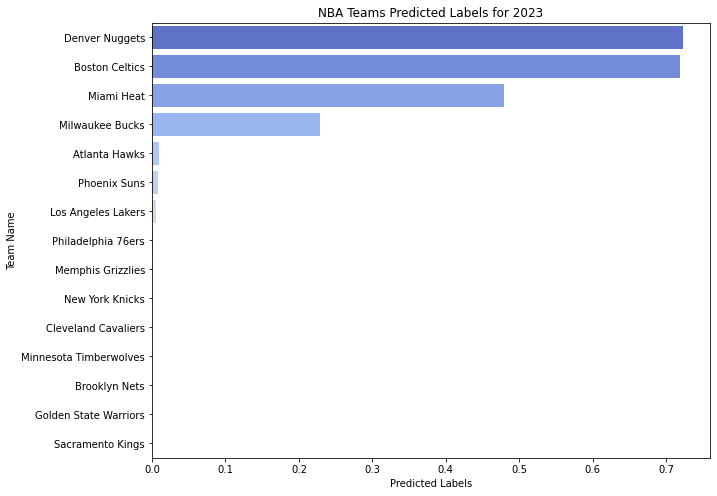

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.barplot(x='Predicted_Labels', y='team_name', data=data_2023_ranked, palette='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('Team Name')
plt.title('NBA Teams Predicted Labels for 2023')
plt.show()


In [12]:
import pandas as pd

# Create a DataFrame from the given data
data = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Team": ["Denver Nuggets", "Boston Celtics", "Miami Heat", "Milwaukee Bucks", "Atlanta Hawks", 
             "Phoenix Suns", "Los Angeles Lakers", "Philadelphia 76ers", "Memphis Grizzlies",
             "New York Knicks", "Cleveland Cavaliers", "Minnesota Timberwolves", "Brooklyn Nets",
             "Golden State Warriors", "Sacramento Kings", "Los Angeles Clippers"],
    "Score": [0.7233, 0.7187, 0.4796, 0.2291, 0.0090, 0.0081, 0.0060, 0.0017, 0.0007, 
              0.0004, 0.0002, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000]
}

df = pd.DataFrame(data)

# Style the DataFrame with a gradient color
df =df.style.background_gradient(cmap='Blues')


import dataframe_image as dfi

dfi.export(df, 'prediction.png')